In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../../../"))

import pandas as pd
import utils
# Mining: multidupehack
# Plotting
import plot_automations as plotter

Loïc Cerf and Wagner Meira Jr. Complete Discovery of High-Quality Patterns in Large Numerical Tensors. In ICDE'14: Proceedings of the 30th International Conference on Data Engineering, pages 448–459. IEEE Computer Society, April 2014.

**1. Multidupehack input file**

In [2]:
df = pd.read_csv("../../../../01_color_clustering/non-weighted/omniart-post-color-clustering.csv")

In [3]:
color_clusters = pd.read_csv("../../../../01_color_clustering/non-weighted/color_centroids.csv")

In [4]:
#utils.prepare_multidupehack_input(df, color_clusters, "school", "school_mining.txt")

**2. Itemset mining**

In [5]:
patterns_df = utils.parse_patterns("school_patterns.txt", "schools")

In [6]:
hex_to_name = dict(zip(color_clusters['HEX'].str.upper(), color_clusters['name']))
    
patterns_df['colors_names'] = patterns_df['colors'].apply(
    lambda hex_list: [hex_to_name[hex.upper()] for hex in (eval(hex_list) if isinstance(hex_list, str) else hex_list)])

In [7]:
patterns_df

schools  \
0     [_Iran, _Cambodia, _Italy, _Thailand, _modern,...   
1     [_Iran, _Assyria, _Unknown, _Thailand, _modern...   
2     [_Iran, _Sasanian_Empire, _modern, _Thailand, ...   
3     [_Iran, _Kushan_Empire, _Thailand, _Ethiopia, ...   
4     [_Iran, _modern, _Thailand, _Ethiopia, _United...   
...                                                 ...   
2685  [_Tibet, _Switzerland, _Russia, _China, _Japan...   
2686  [_Scotland, _Belgium, _China, _Russia, _Japan,...   
2687  [_Scotland, _Belgium, _modern, _Russia, _Japan...   
2688  [_Scotland, _China, _Russia, _Japan, _Austria,...   
2689  [_Scotland, _modern, _Russia, _Japan, _Austria...   

                                                 colors  n_schools  n_colors  \
0                           [#C5B6B6, #292525, #A39695]         38         3   
1                           [#7E7373, #C5B6B6, #292525]         38         3   
2                           [#7E7373, #C5B6B6, #A39695]         38         3   
3                           [#7E7373, #292525, #A39695]         38         3   
4                  [#7E7373, #C5B6B6, #292525, #A39695]         37         4   
...                                                 ...        ...       ...   
2685  [#7B2E28, #9A191C, #C33C43, #592C30, #61201B, ...         16        40   
2686  [#7B2E28, #4B100D, #EB4D4C, #592C30, #61201B, ...         16        40   
2687  [#7B2E28, #4B100D, #280203, #EB4D4C, #592C30, ...         15        41   
2688  [#7B2E28, #4B100D, #EB4D4C, #9A191C, #592C30, ...         15        41   
2689  [#7B2E28, #4B100D, #280203, #EB4D4C, #9A191C, ...         14        42   

      support                                       colors_names  
0         114                       [pinkish-grey, dark, cement]  
1         114                  [medium-grey, pinkish-grey, dark]  
2         114                [medium-grey, pinkish-grey, cement]  
3         114                        [medium-grey, dark, cement]  
4         148          [medium-grey, pinkish-grey, dark, cement]  
...       ...                                                ...  
2685      640  [red-brown, carmine, reddish, purple-brown, re...  
2686      640  [red-brown, chocolate-brown, pale-red, purple-...  
2687      615  [red-brown, chocolate-brown, very-dark-brown, ...  
2688      615  [red-brown, chocolate-brown, pale-red, carmine...  
2689      588  [red-brown, chocolate-brown, very-dark-brown, ...  

[2690 rows x 6 columns]

Plot saved to images/school_patterns_per_support_count.png


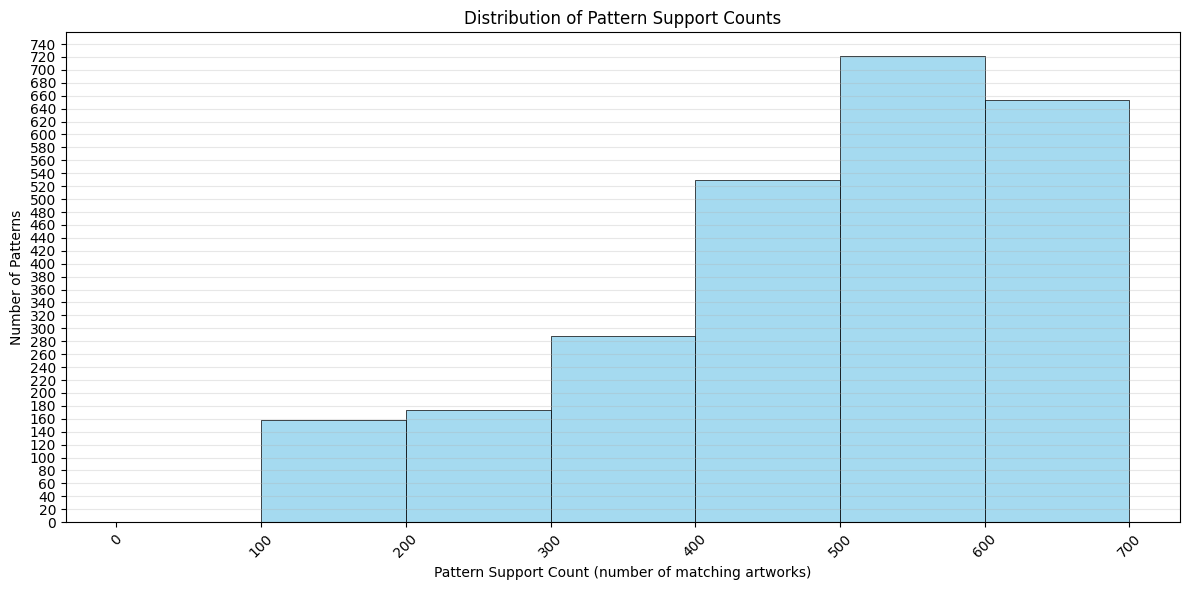

In [8]:
plotter.plot_support_analysis(patterns_df, "images/school_patterns_per_support_count.png")

Plot saved to images/school_n_school_per_pattern.png


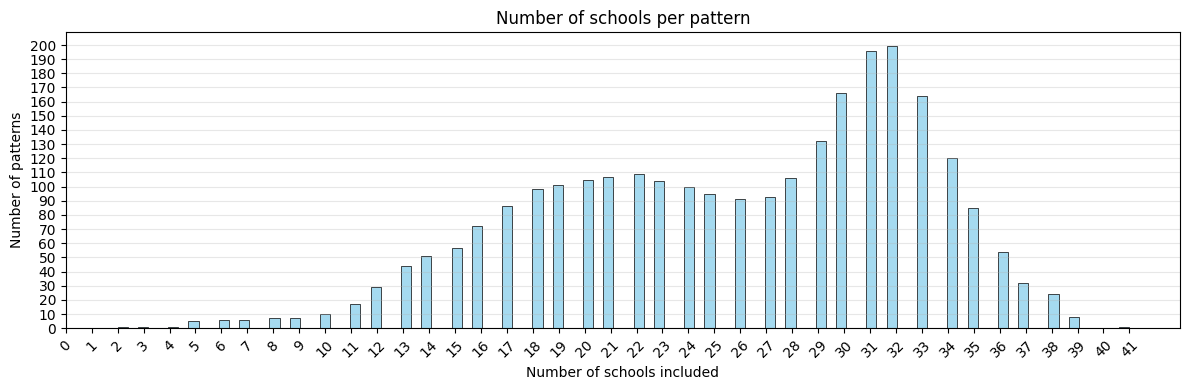

In [9]:
plotter.plot_pattern_size_distribution(patterns_df, "schools", "images/school_n_school_per_pattern.png")

Plot saved to images/school_n_colors_per_pattern.png


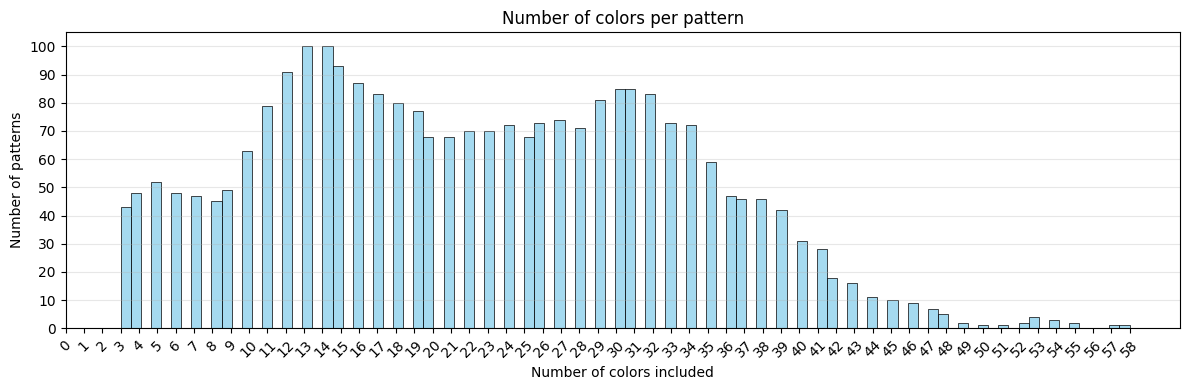

In [19]:
plotter.plot_pattern_size_distribution(patterns_df, "colors", "images/school_n_colors_per_pattern.png")

Color co-occurrence matrix saved to images/color_cooccurrence_matrix.png


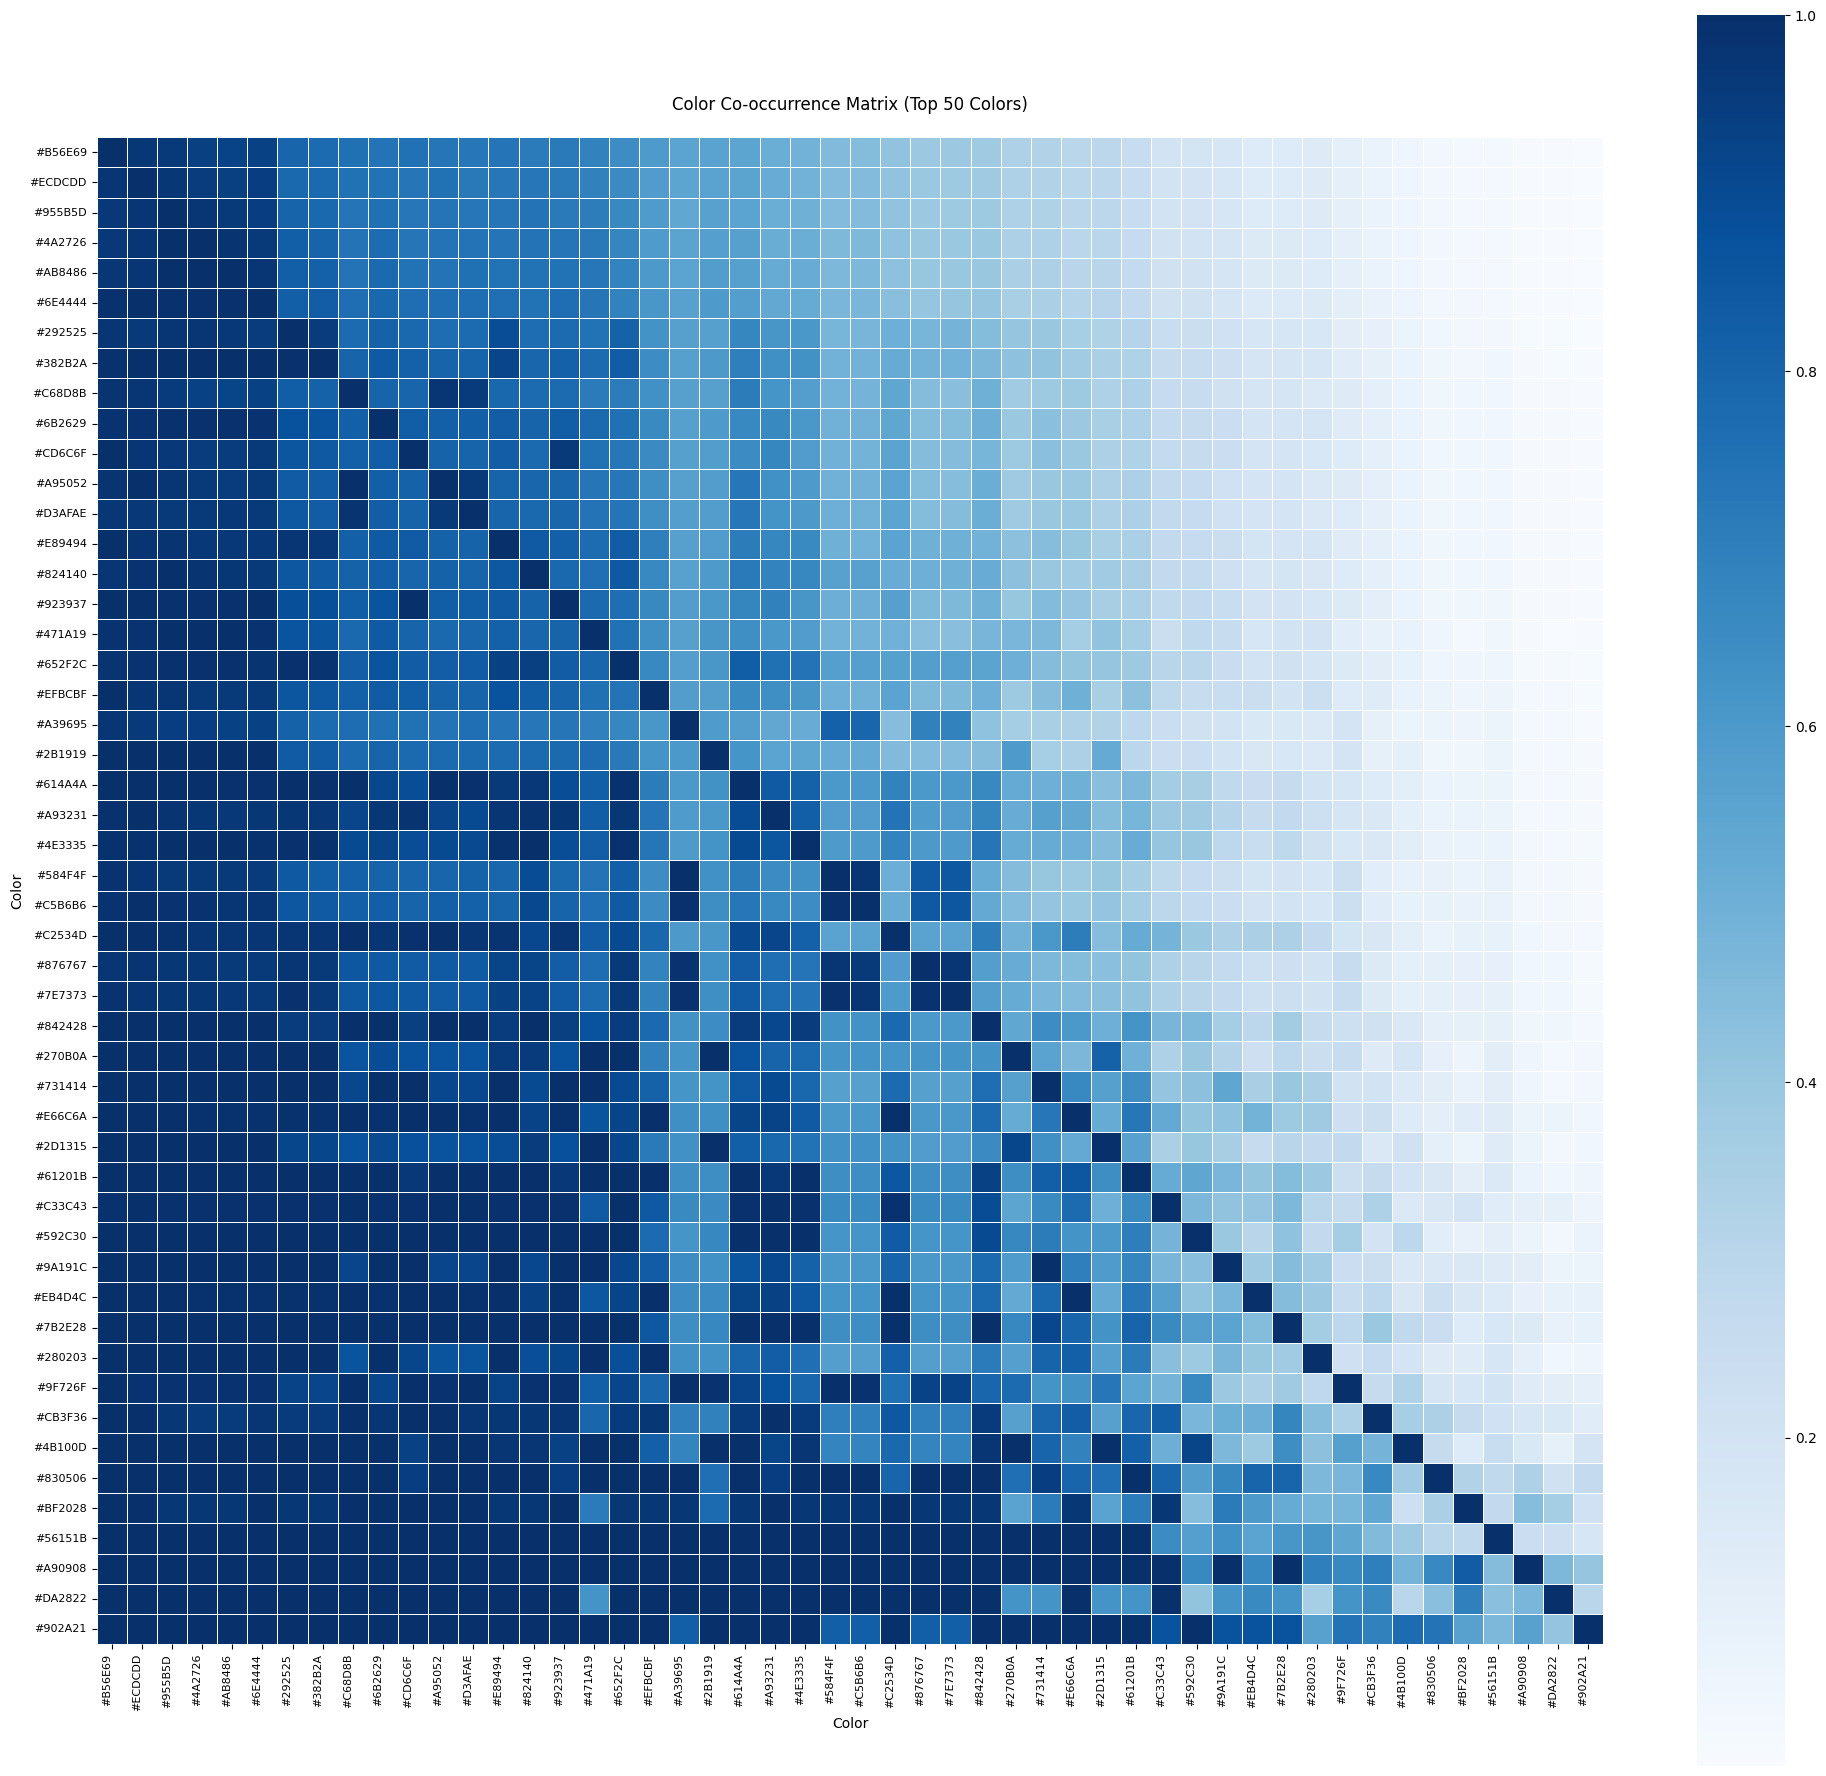

In [13]:
plotter.plot_color_cooccurrence_matrix(patterns_df, save_path="images/color_cooccurrence_matrix.png")

In [14]:
patterns_df['schools_range'] = patterns_df['schools'].apply(
    lambda x: f"{min(x, key=lambda s: len(s))}-{max(x, key=lambda s: len(s))}" 
    if len(x) > 1 
    else x[0]
)

In [15]:
unique_school_ranges = patterns_df['schools_range'].unique()

In [16]:
unique_school_ranges

array(['_Iran-_United_States_of_America',
       '_Korea-_United_States_of_America', '_Korea-_Czech_Republic',
       '_Egypt-_Czech_Republic', '_Egypt-_United_States_of_America',
       '_India-_United_States_of_America', '_Egypt-_Byzantine_Empire',
       '_Korea-_Byzantine_Empire', '_Korea-_United_Kingdom',
       '_Egypt-_Switzerland', '_Egypt-_Netherlands',
       '_India-_Netherlands', '_India-_Switzerland',
       '_India-_Czech_Republic', '_Tibet-_Czech_Republic',
       '_Tibet-_United_States_of_America',
       '_Nepal-_United_States_of_America', '_Nepal-_Czech_Republic',
       '_India-_Byzantine_Empire', '_Nepal-_Byzantine_Empire',
       '_Tibet-_United_Kingdom', '_India-_United_Kingdom',
       '_Nepal-_United_Kingdom', '_Tibet-_Byzantine_Empire',
       '_Japan-_Byzantine_Empire', '_Japan-_United_States_of_America',
       '_China-_United_States_of_America', '_China-_United_Kingdom',
       '_France-_Unknown', '_modern-_Unknown', '_Italy-_Hungary',
       '_Italy-_German

Plot saved to images/color_palettes/_Iran-_United_States_of_America.png


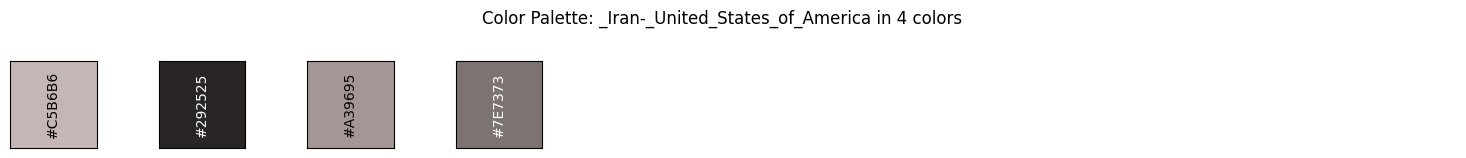

Plot saved to images/color_palettes/_Korea-_United_States_of_America.png


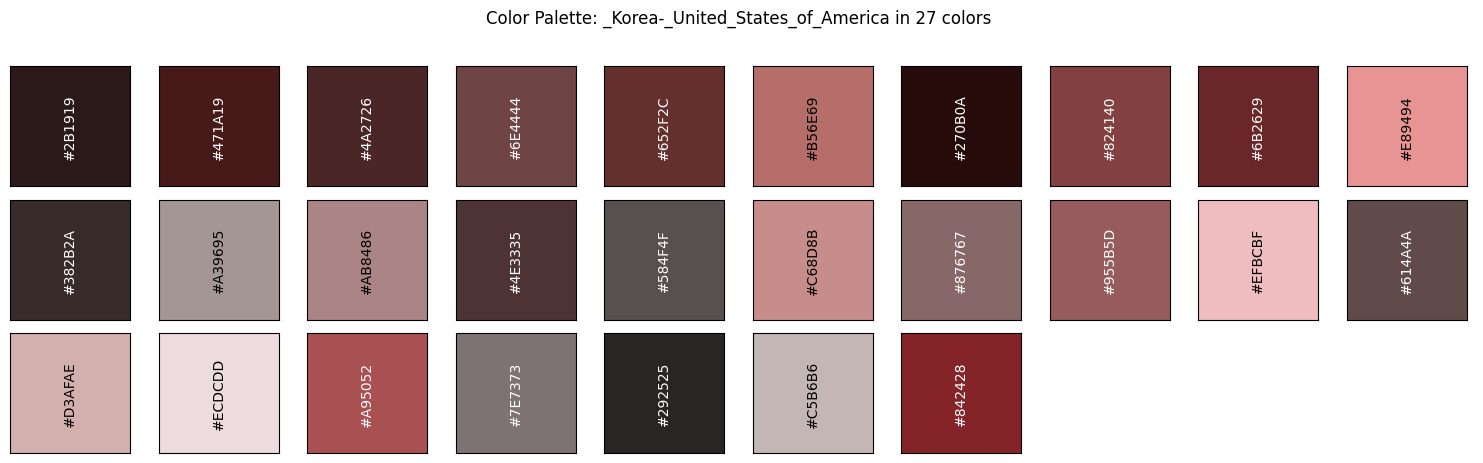

Plot saved to images/color_palettes/_Korea-_Czech_Republic.png


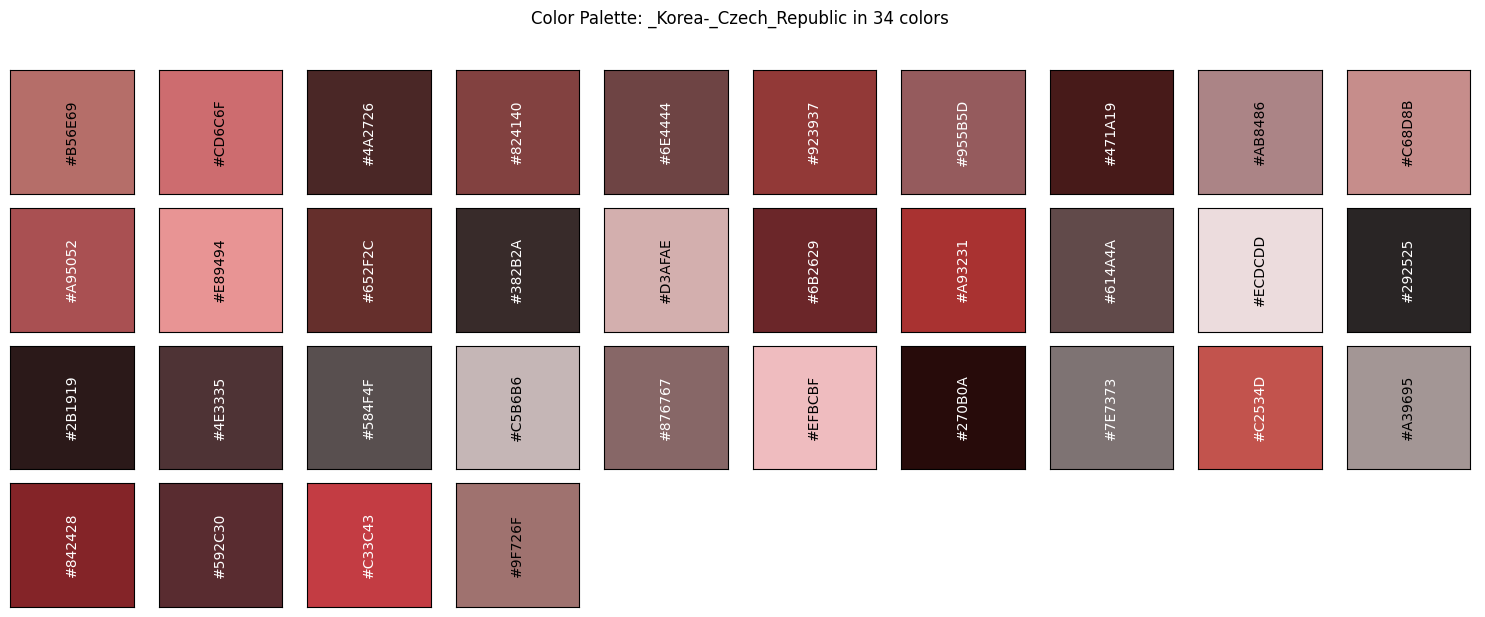

Plot saved to images/color_palettes/_Egypt-_Czech_Republic.png


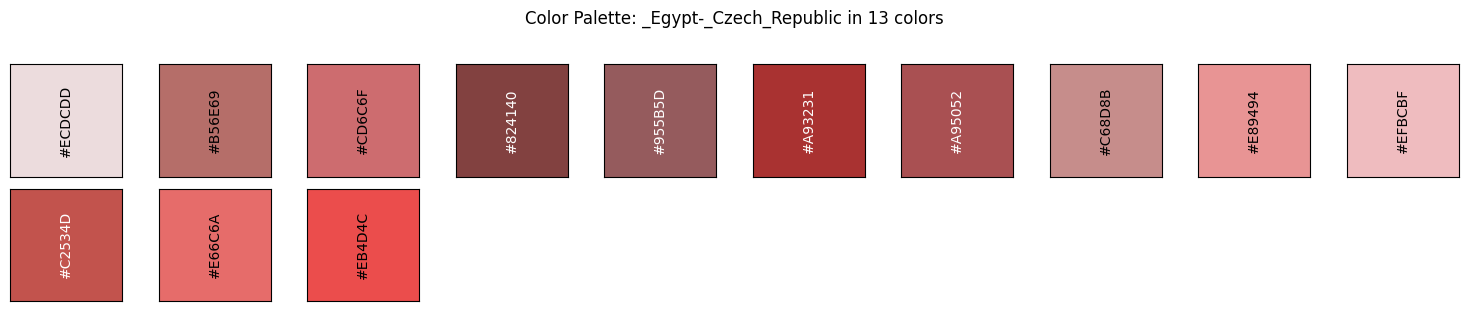

Plot saved to images/color_palettes/_Egypt-_United_States_of_America.png


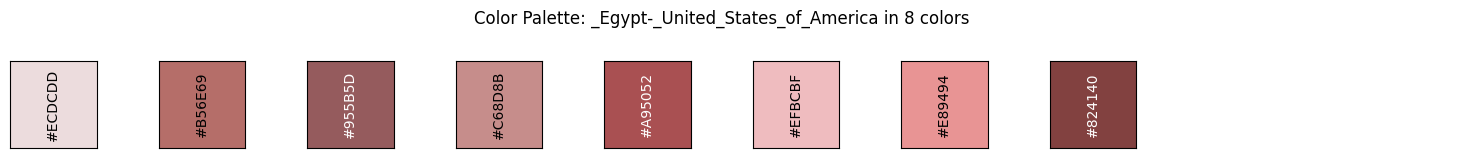

Plot saved to images/color_palettes/_India-_United_States_of_America.png


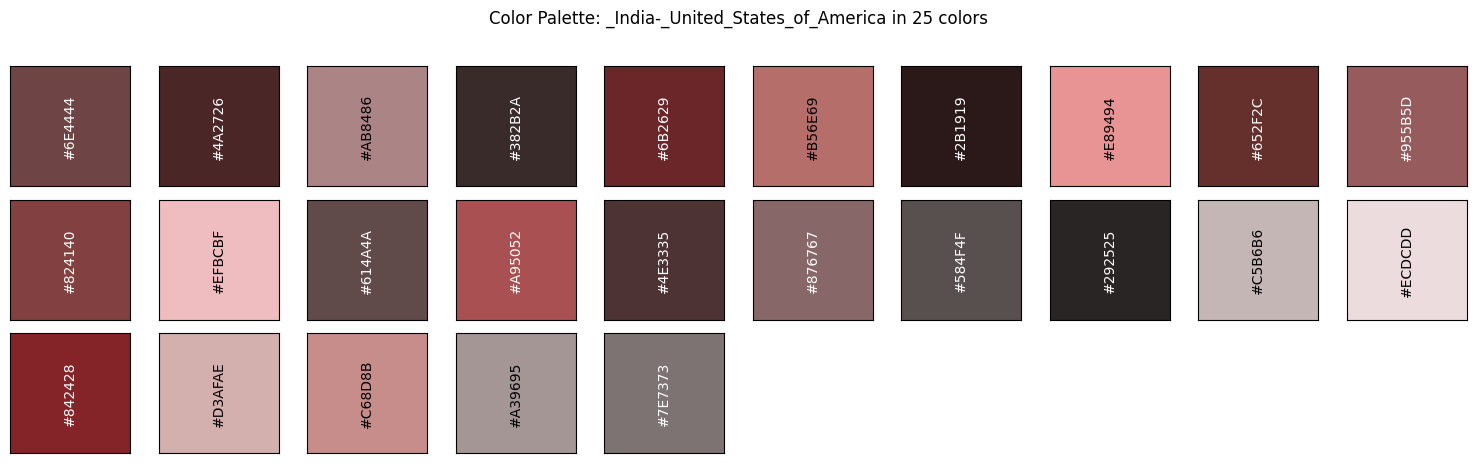

Plot saved to images/color_palettes/_Egypt-_Byzantine_Empire.png


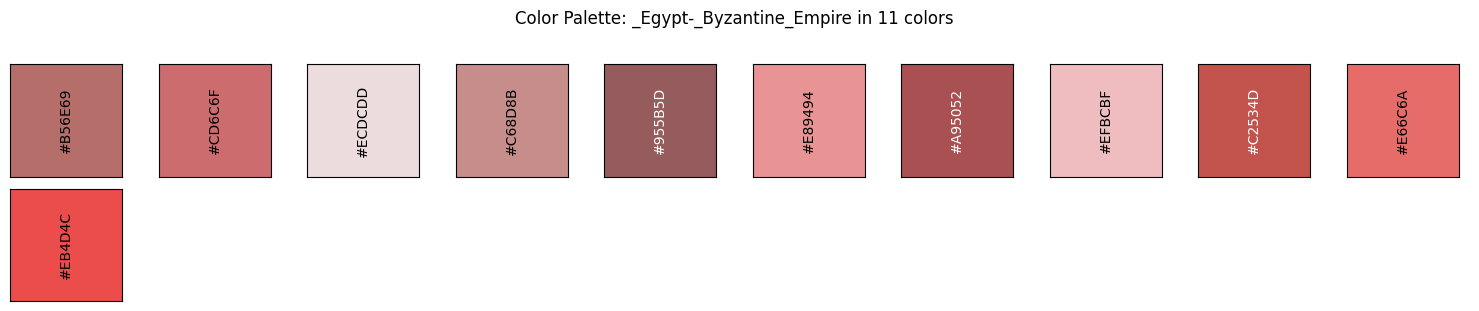

Plot saved to images/color_palettes/_Korea-_Byzantine_Empire.png


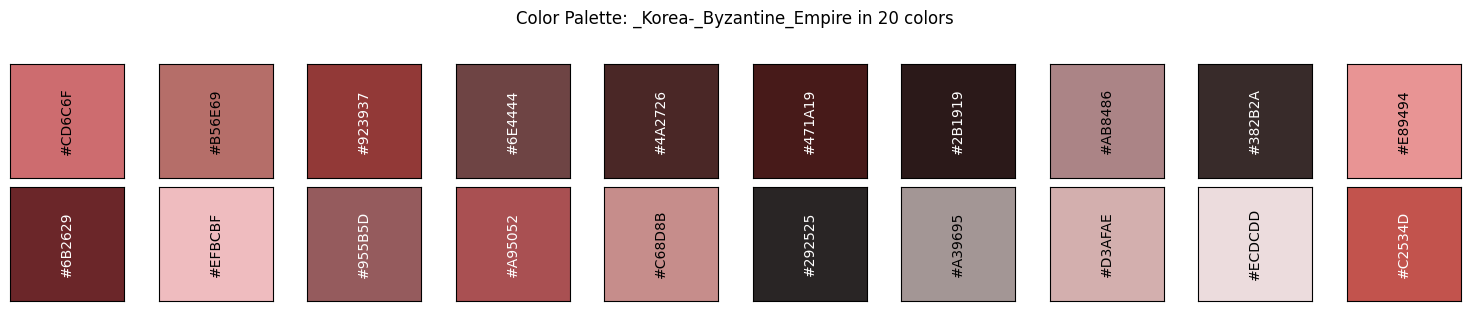

Plot saved to images/color_palettes/_Korea-_United_Kingdom.png


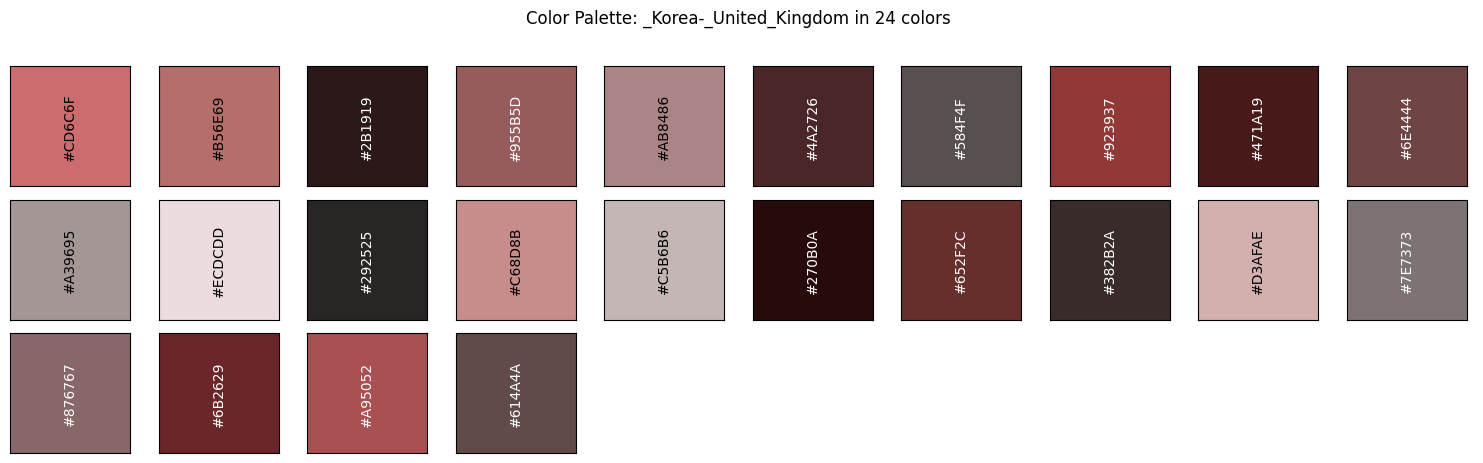

Plot saved to images/color_palettes/_Egypt-_Switzerland.png


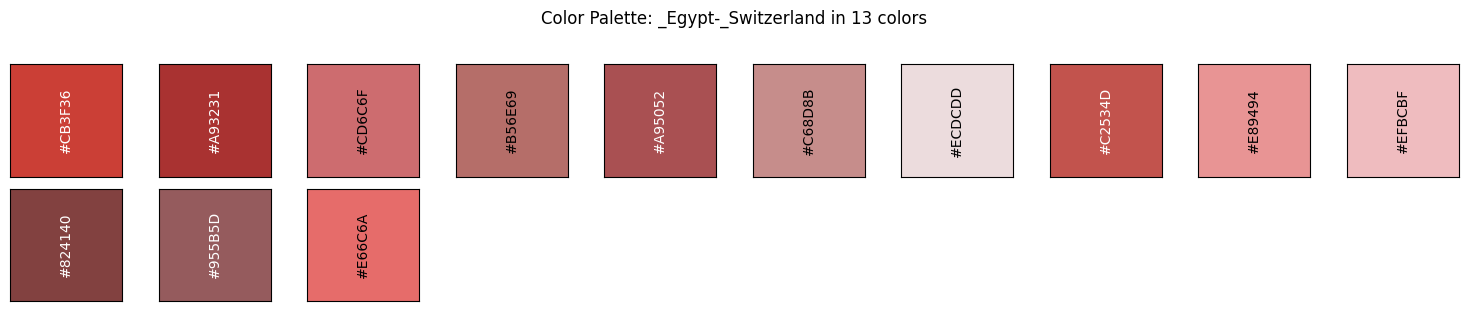

Plot saved to images/color_palettes/_Egypt-_Netherlands.png


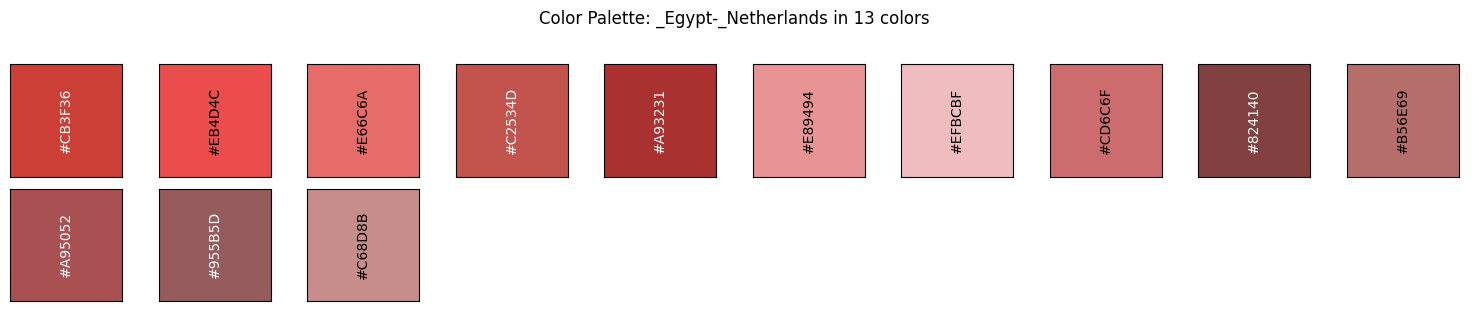

Plot saved to images/color_palettes/_India-_Netherlands.png


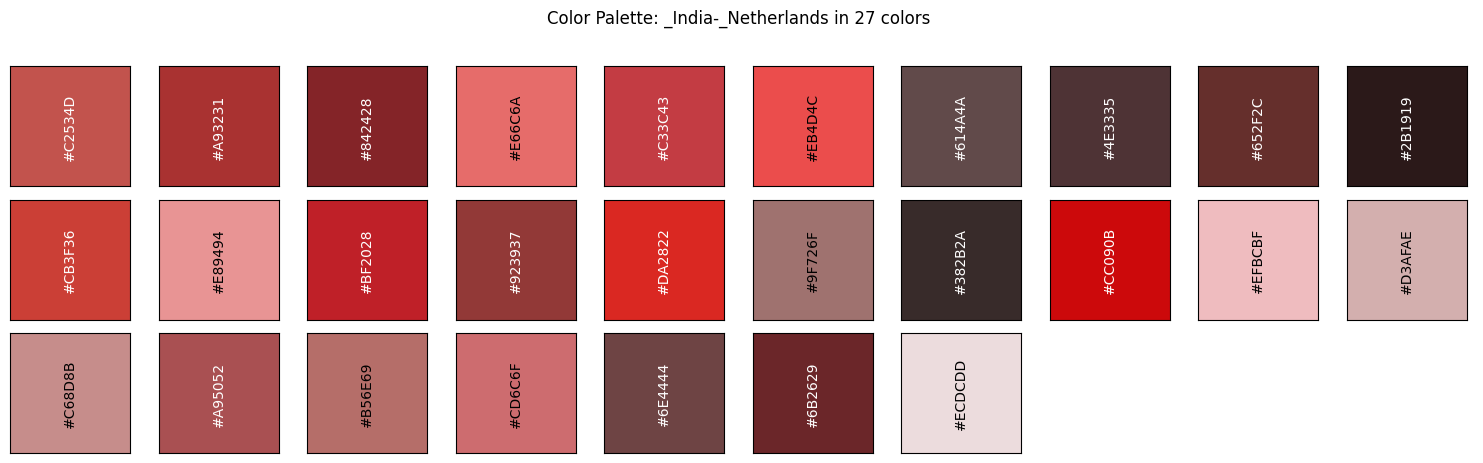

Plot saved to images/color_palettes/_India-_Switzerland.png


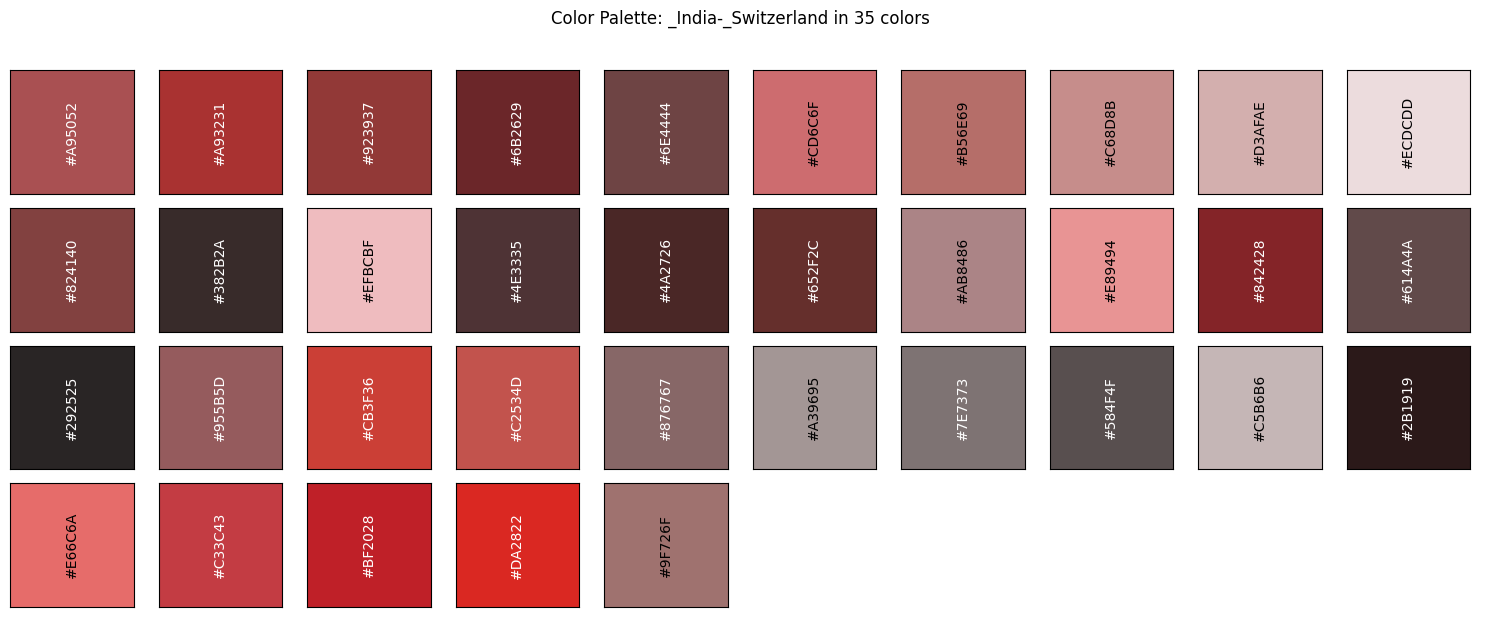

Plot saved to images/color_palettes/_India-_Czech_Republic.png


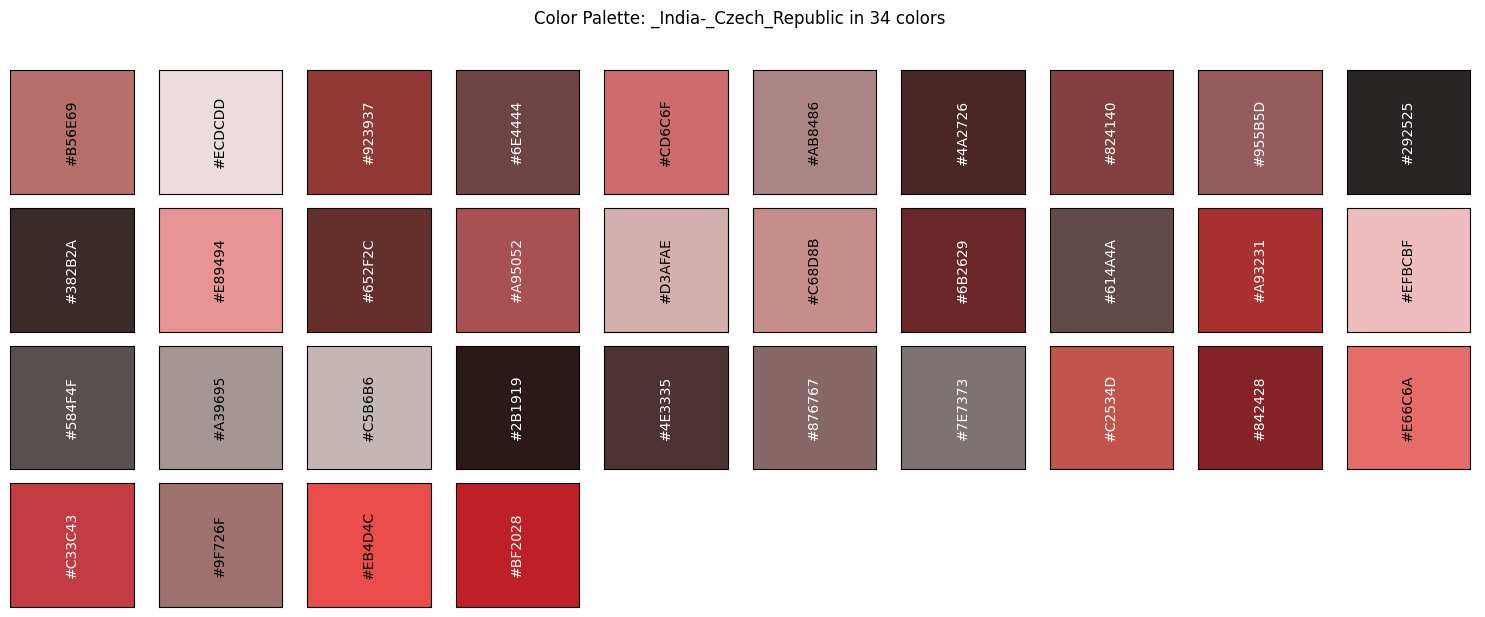

Plot saved to images/color_palettes/_Tibet-_Czech_Republic.png


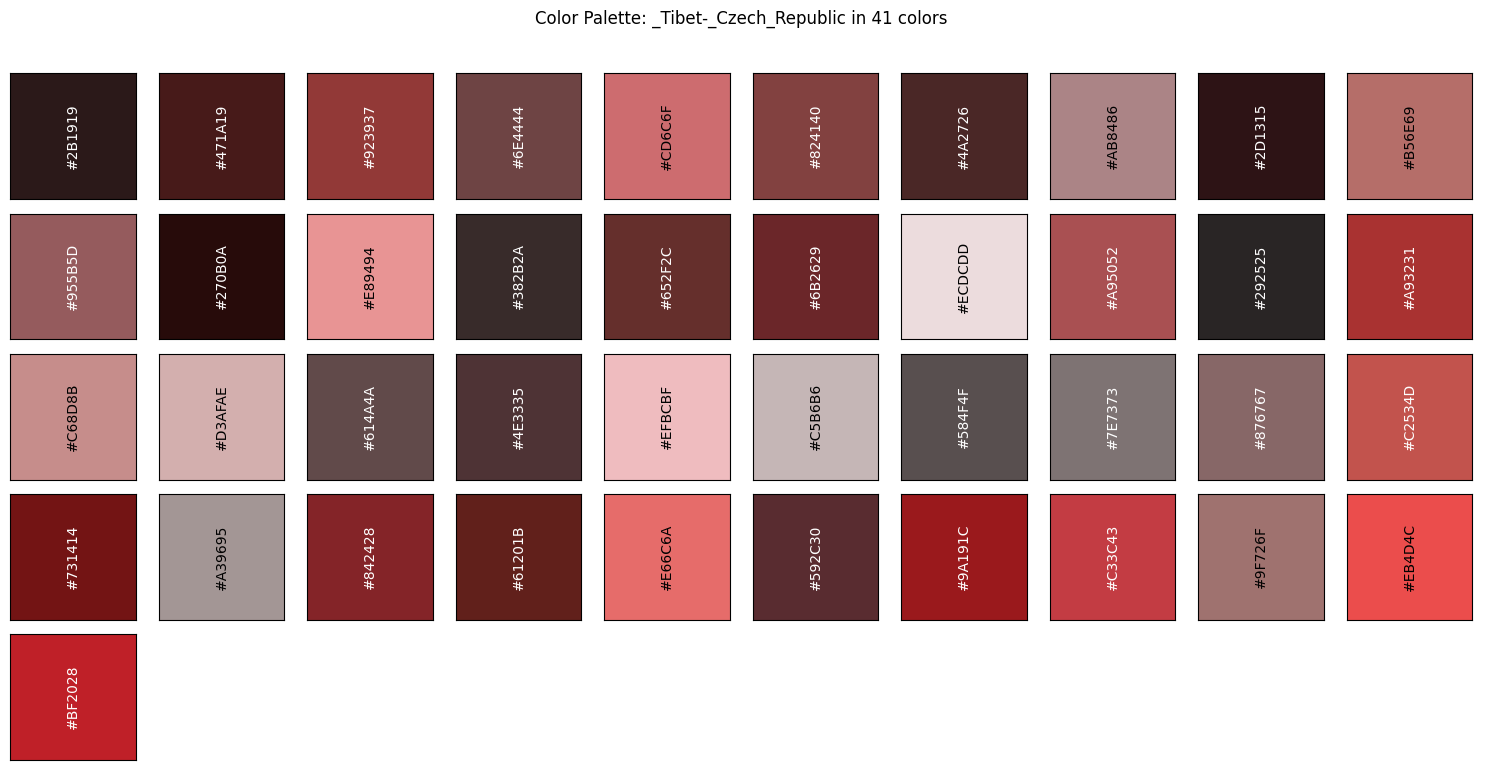

Plot saved to images/color_palettes/_Tibet-_United_States_of_America.png


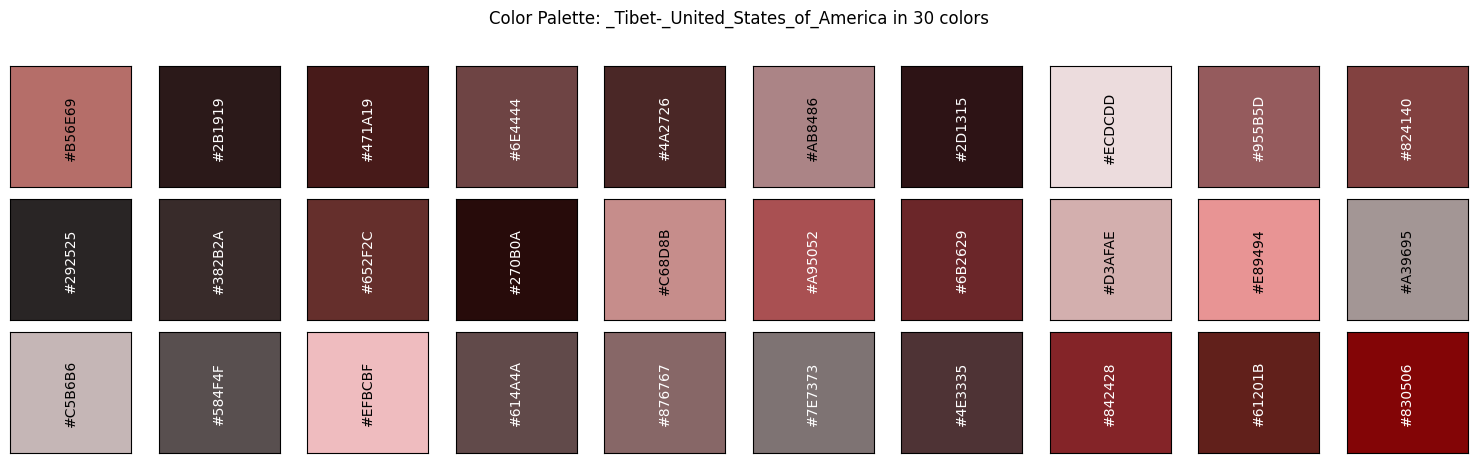

Plot saved to images/color_palettes/_Nepal-_United_States_of_America.png


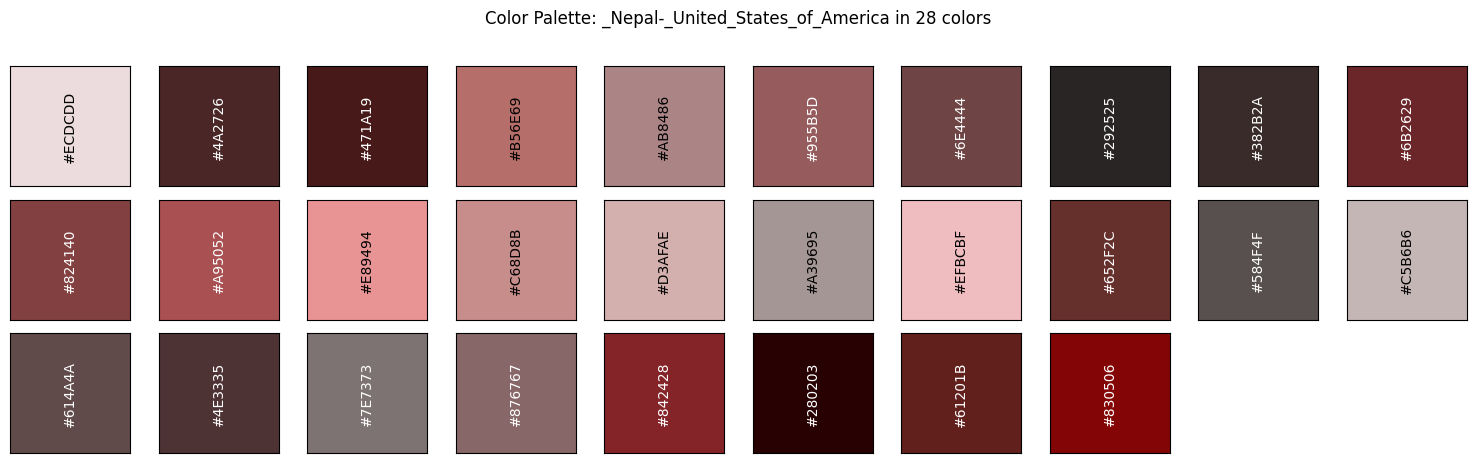

Plot saved to images/color_palettes/_Nepal-_Czech_Republic.png


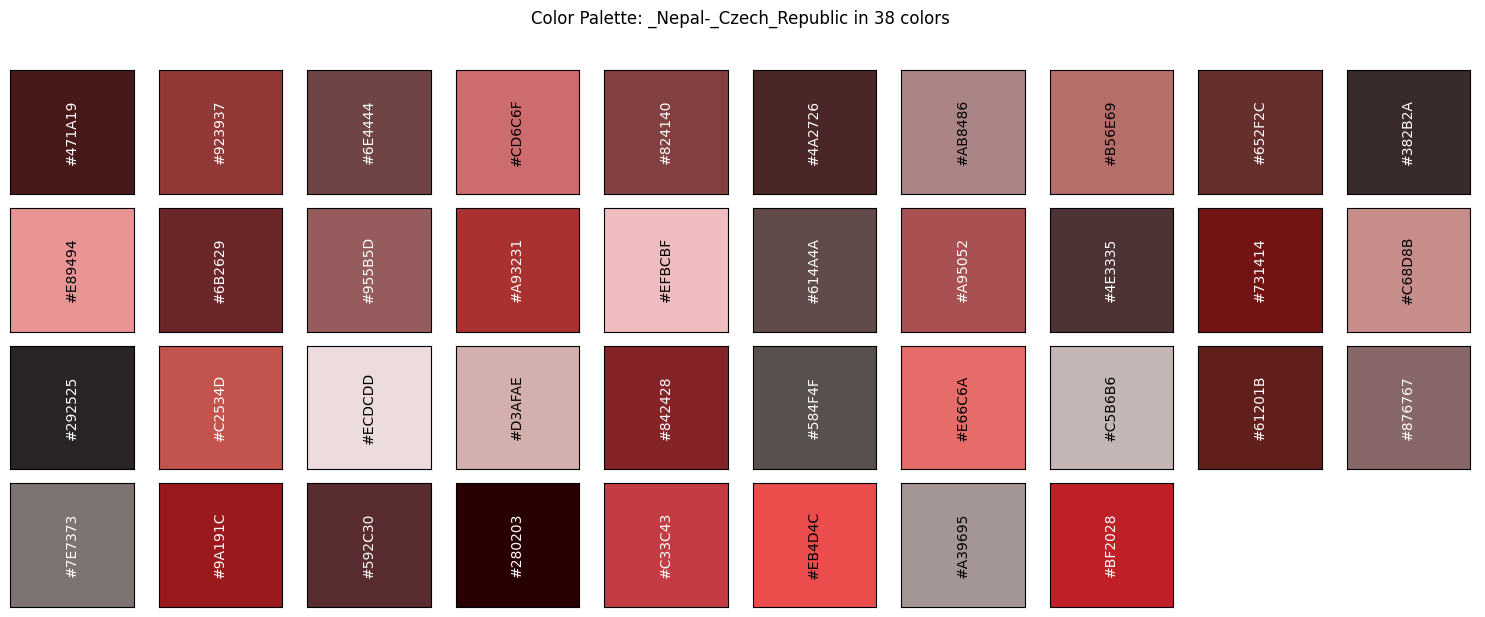

Plot saved to images/color_palettes/_India-_Byzantine_Empire.png


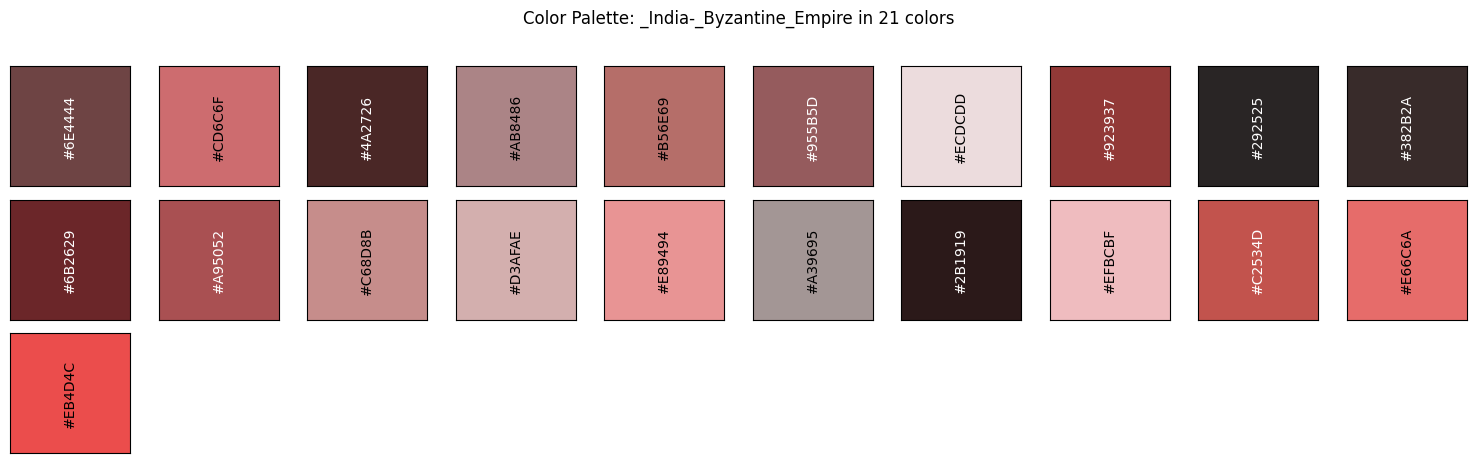

Plot saved to images/color_palettes/_Nepal-_Byzantine_Empire.png


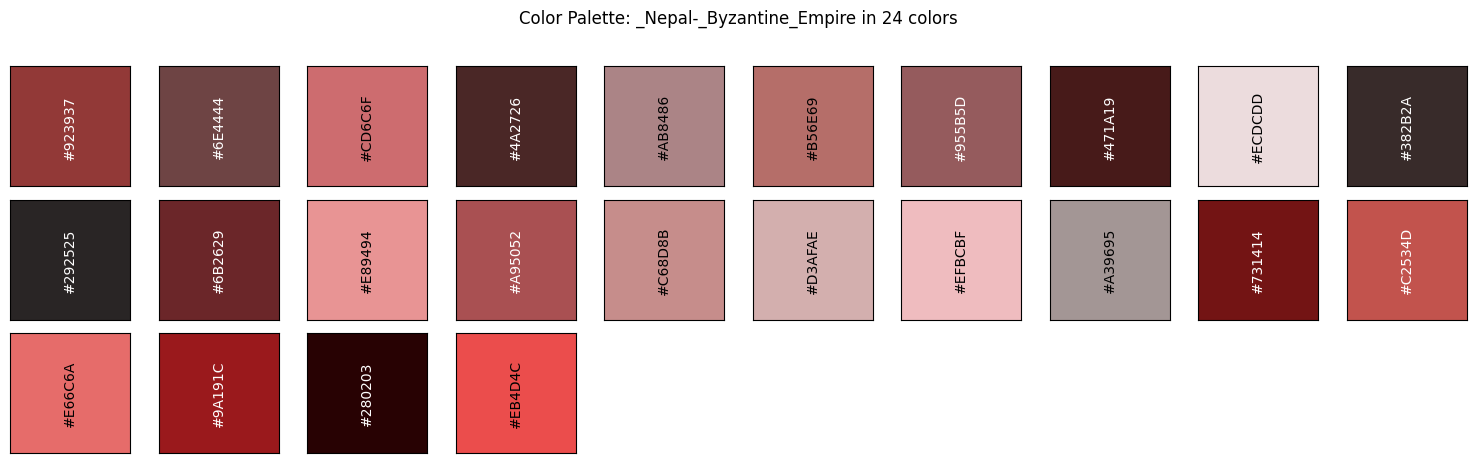

Plot saved to images/color_palettes/_Tibet-_United_Kingdom.png


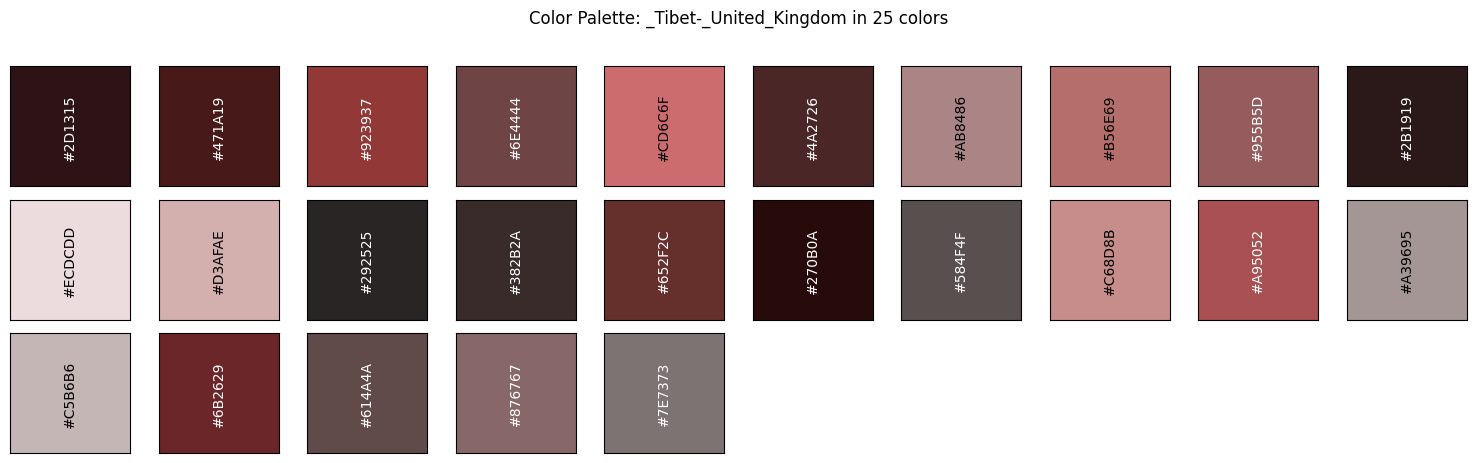

Plot saved to images/color_palettes/_India-_United_Kingdom.png


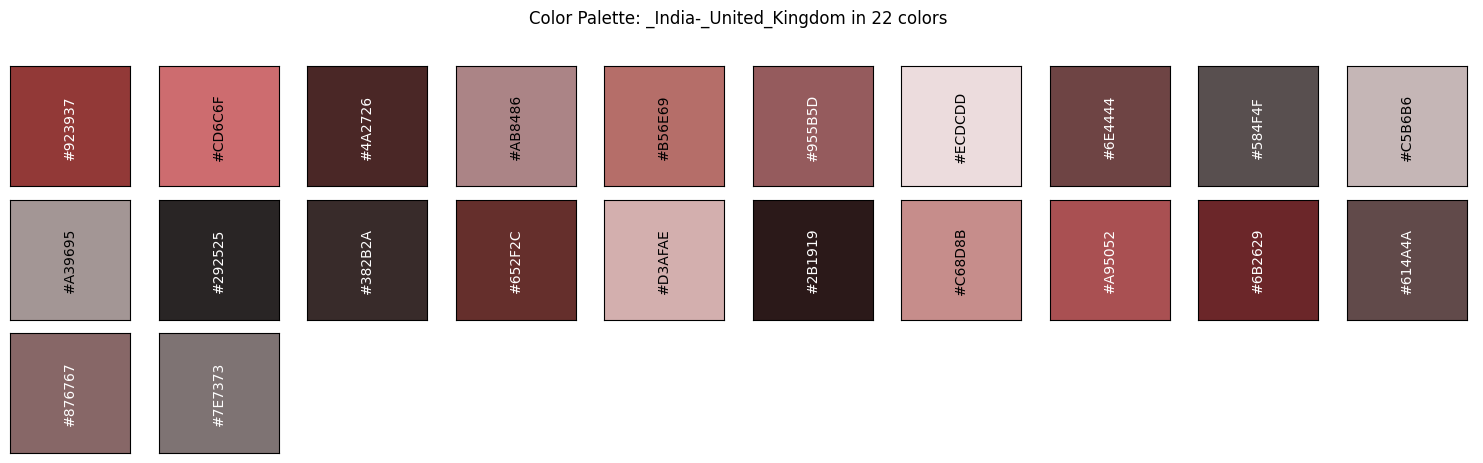

Plot saved to images/color_palettes/_Nepal-_United_Kingdom.png


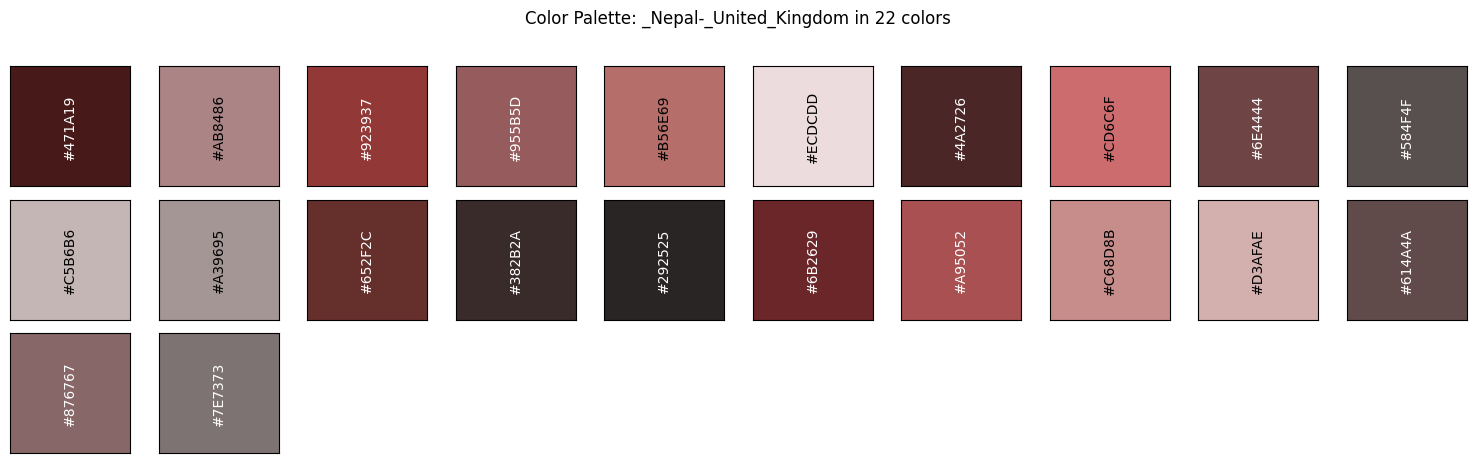

Plot saved to images/color_palettes/_Tibet-_Byzantine_Empire.png


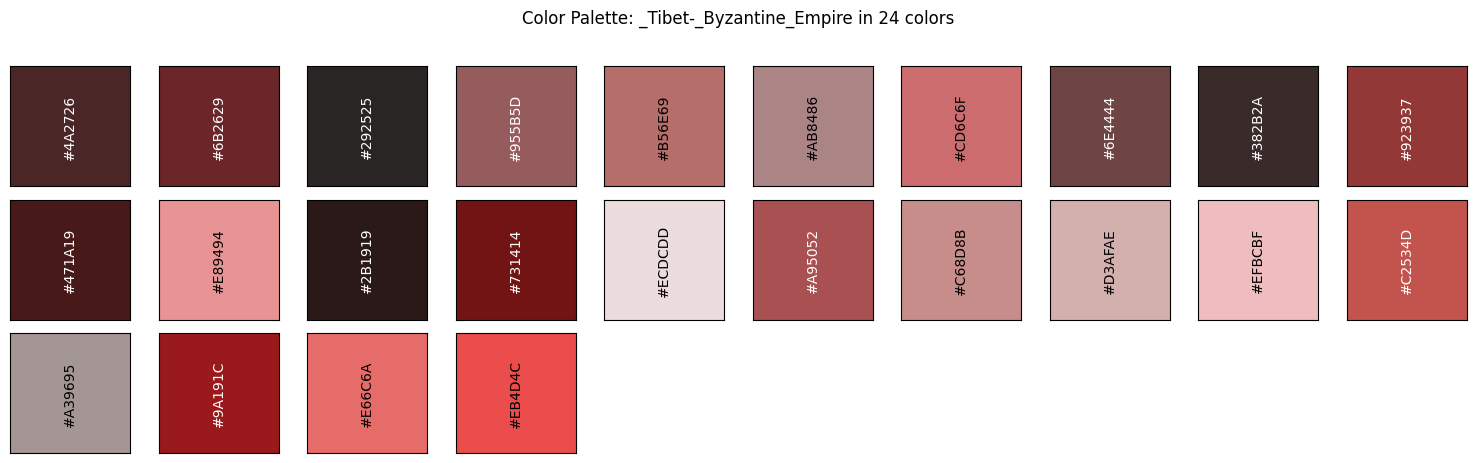

Plot saved to images/color_palettes/_Japan-_Byzantine_Empire.png


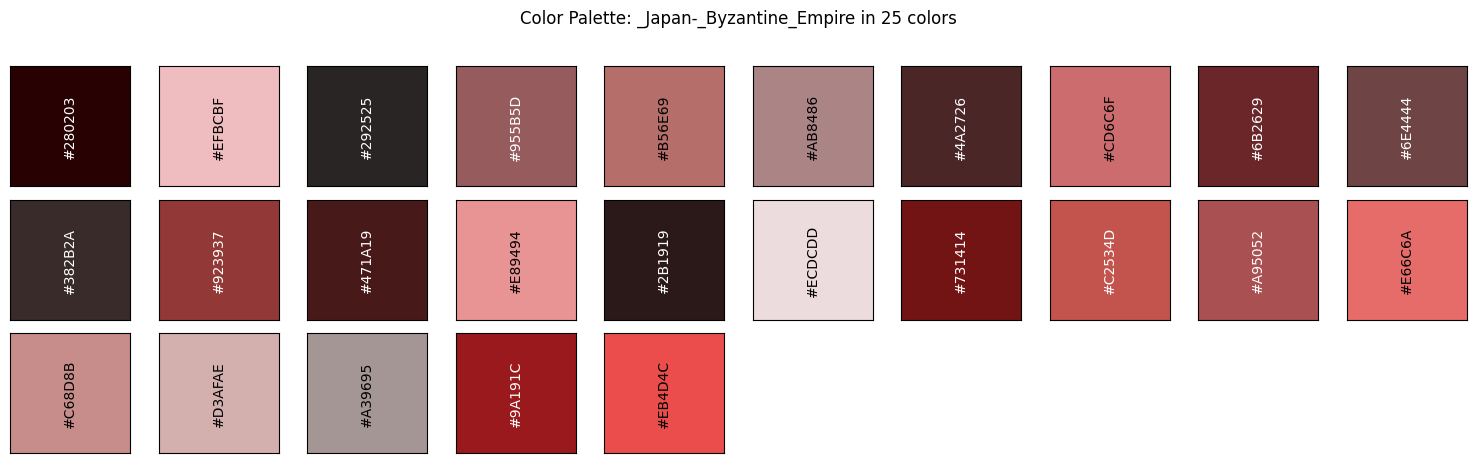

Plot saved to images/color_palettes/_Japan-_United_States_of_America.png


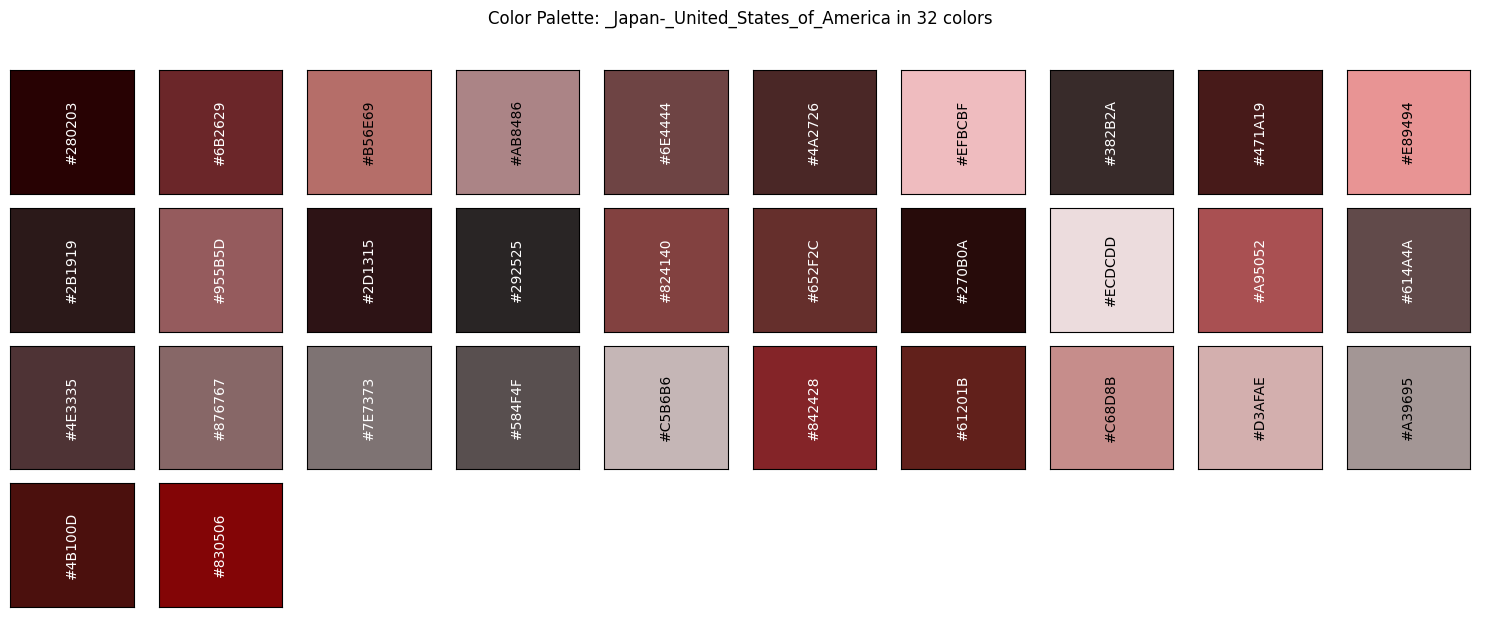

Plot saved to images/color_palettes/_China-_United_States_of_America.png


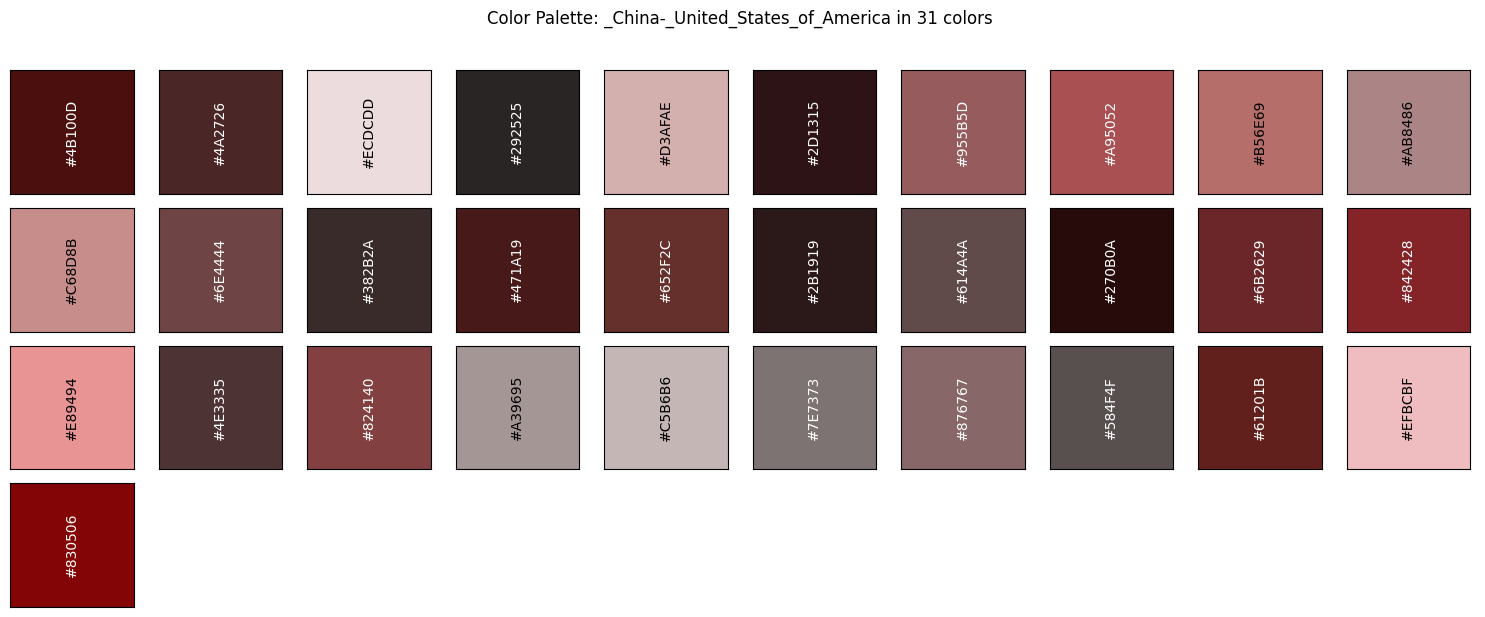

Plot saved to images/color_palettes/_China-_United_Kingdom.png


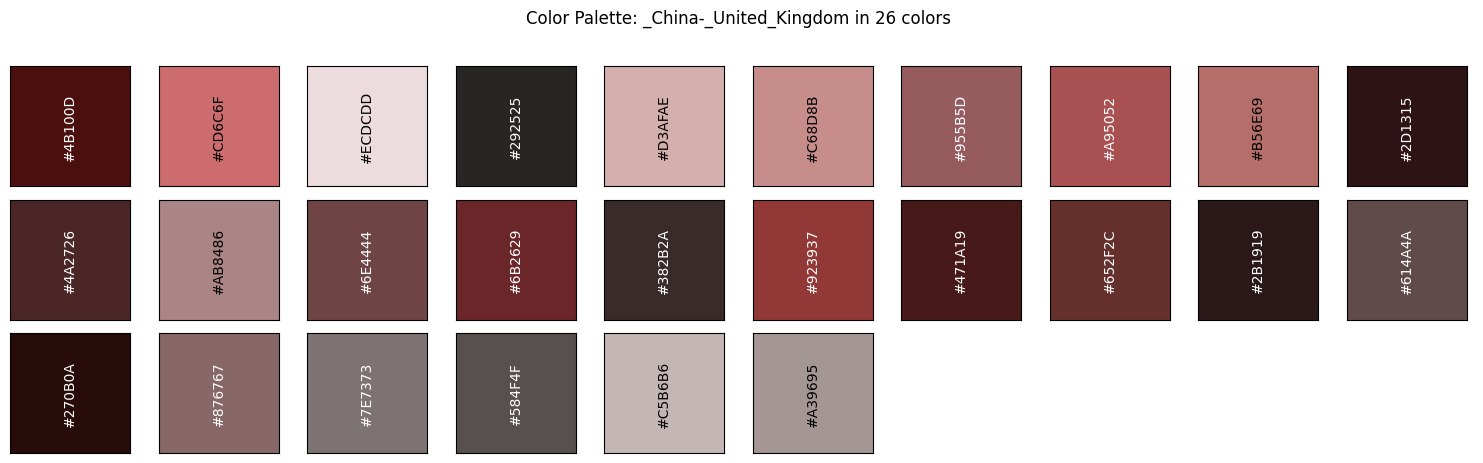

Plot saved to images/color_palettes/_France-_Unknown.png


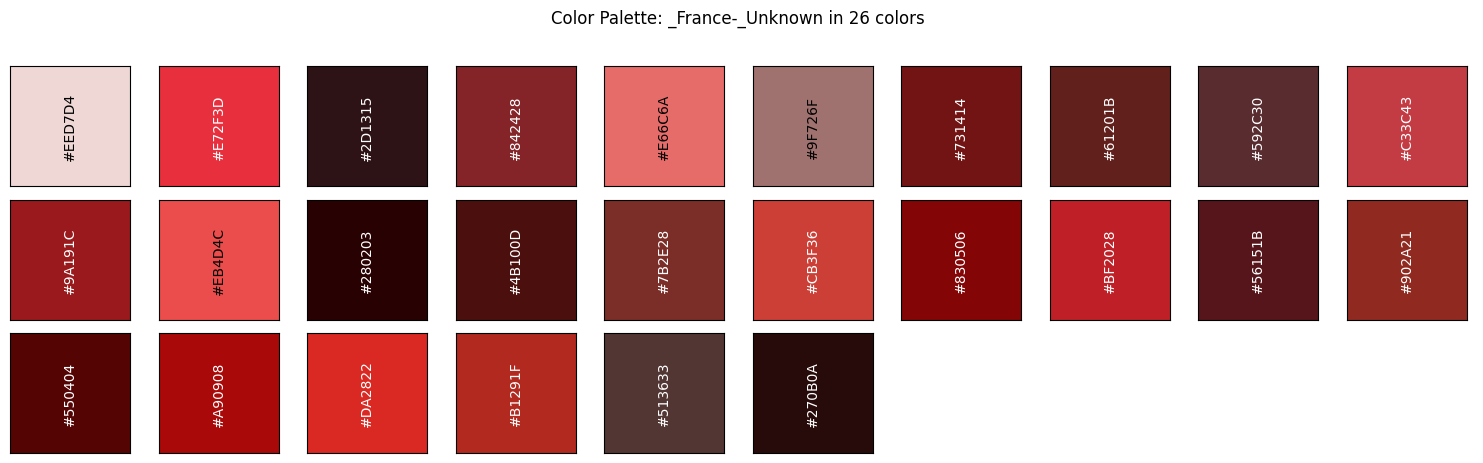

Plot saved to images/color_palettes/_modern-_Unknown.png


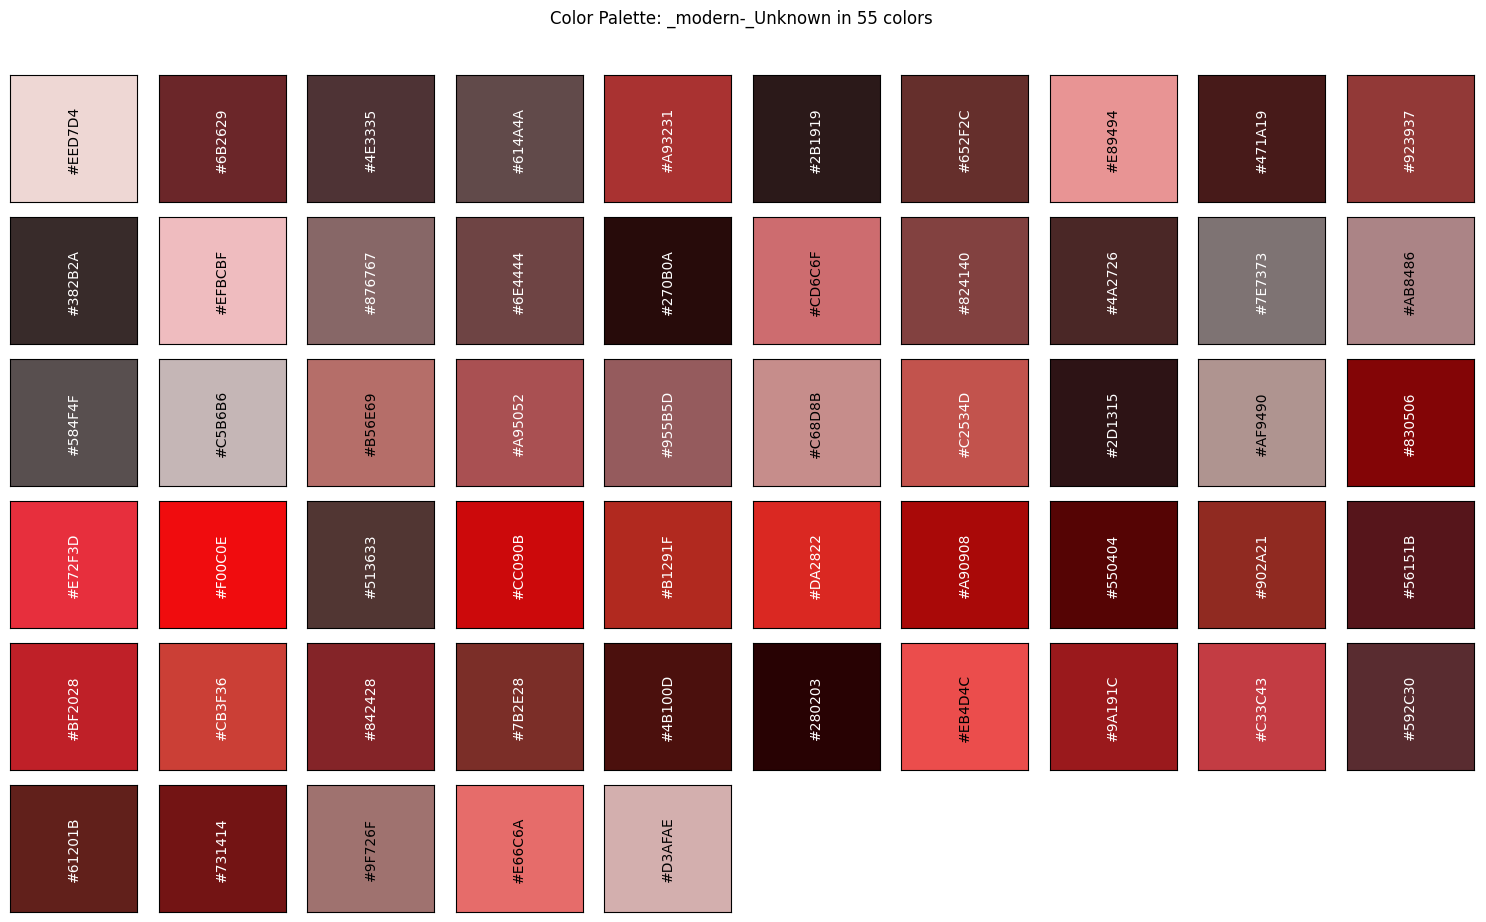

Plot saved to images/color_palettes/_Italy-_Hungary.png


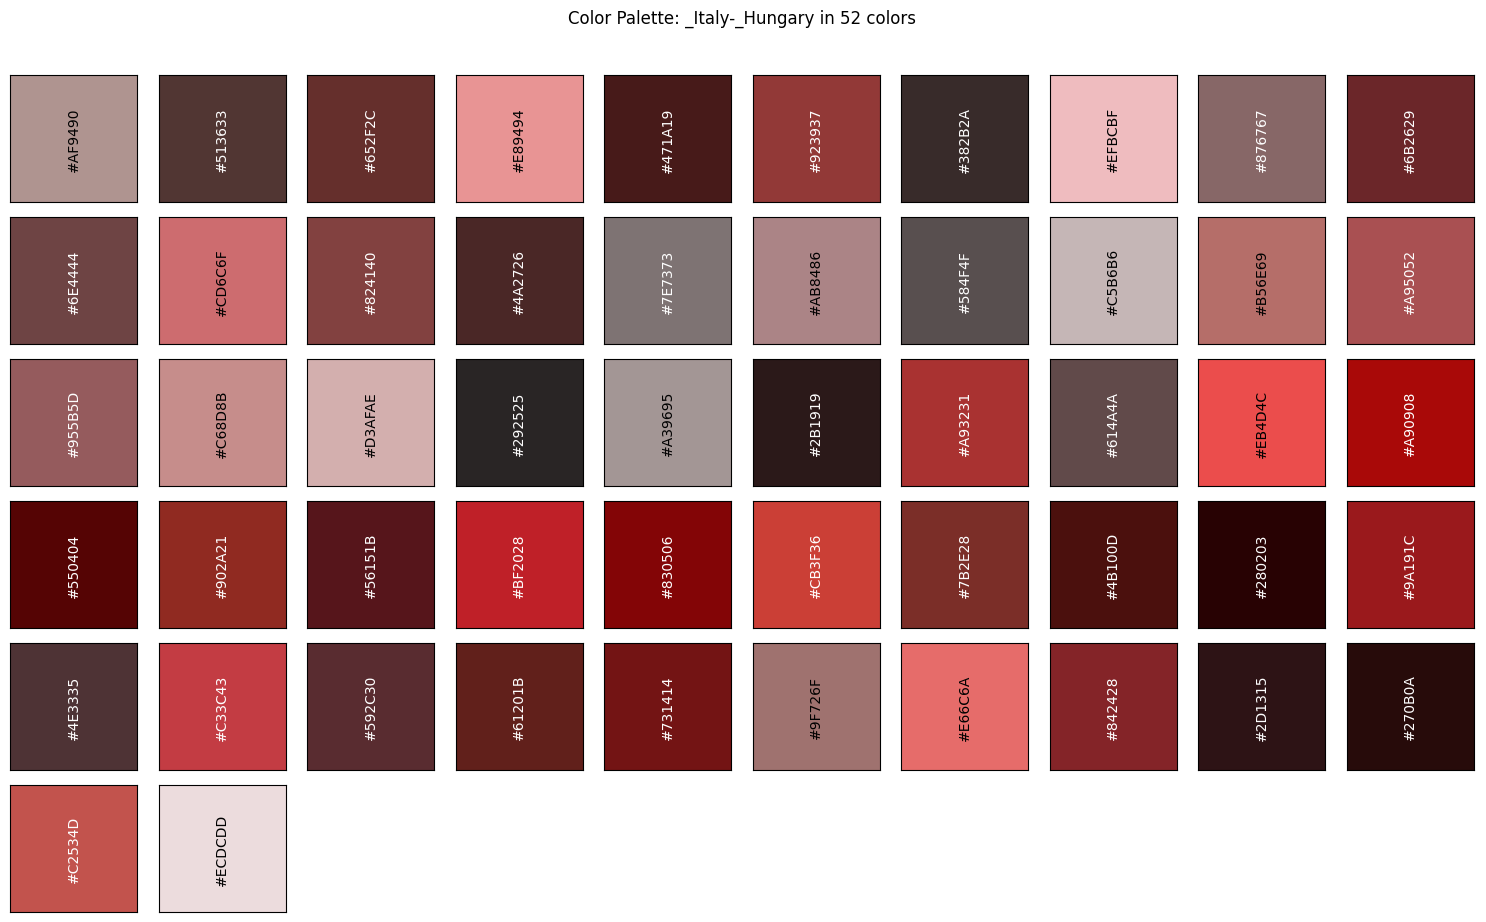

Plot saved to images/color_palettes/_Italy-_Germany.png


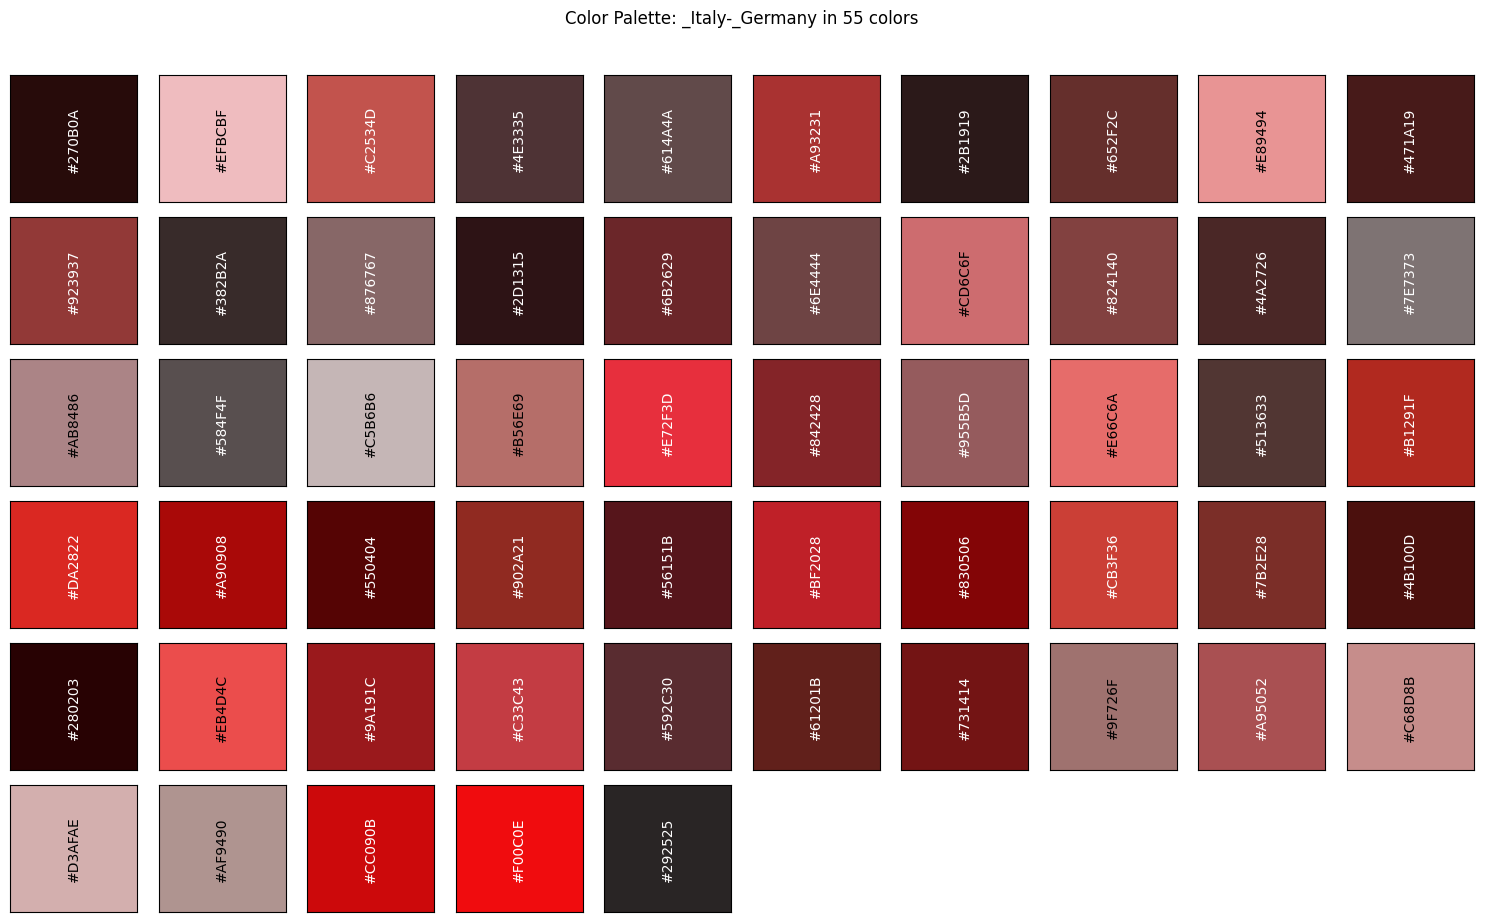

Plot saved to images/color_palettes/_Japan-_Czech_Republic.png


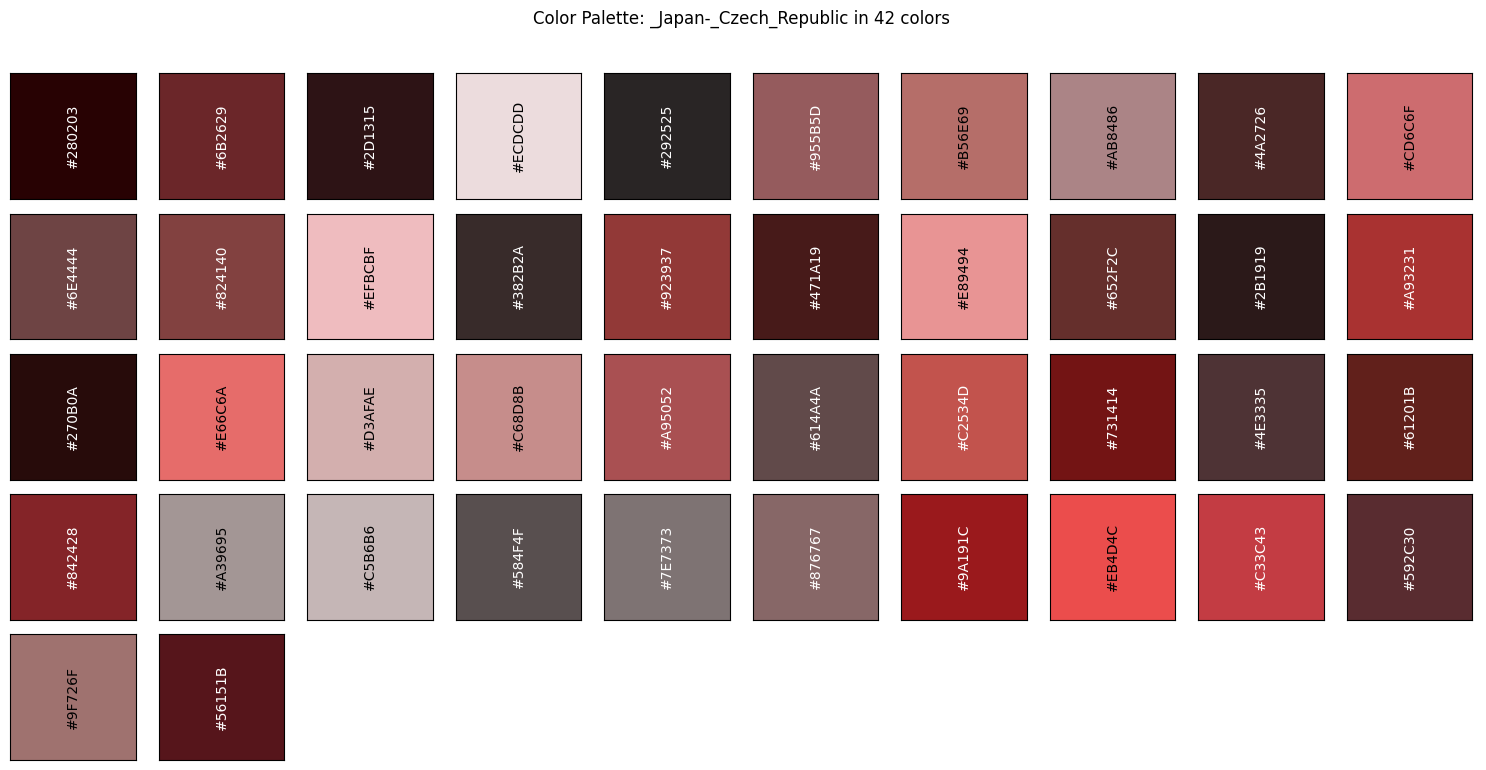

Plot saved to images/color_palettes/_Spain-_Germany.png


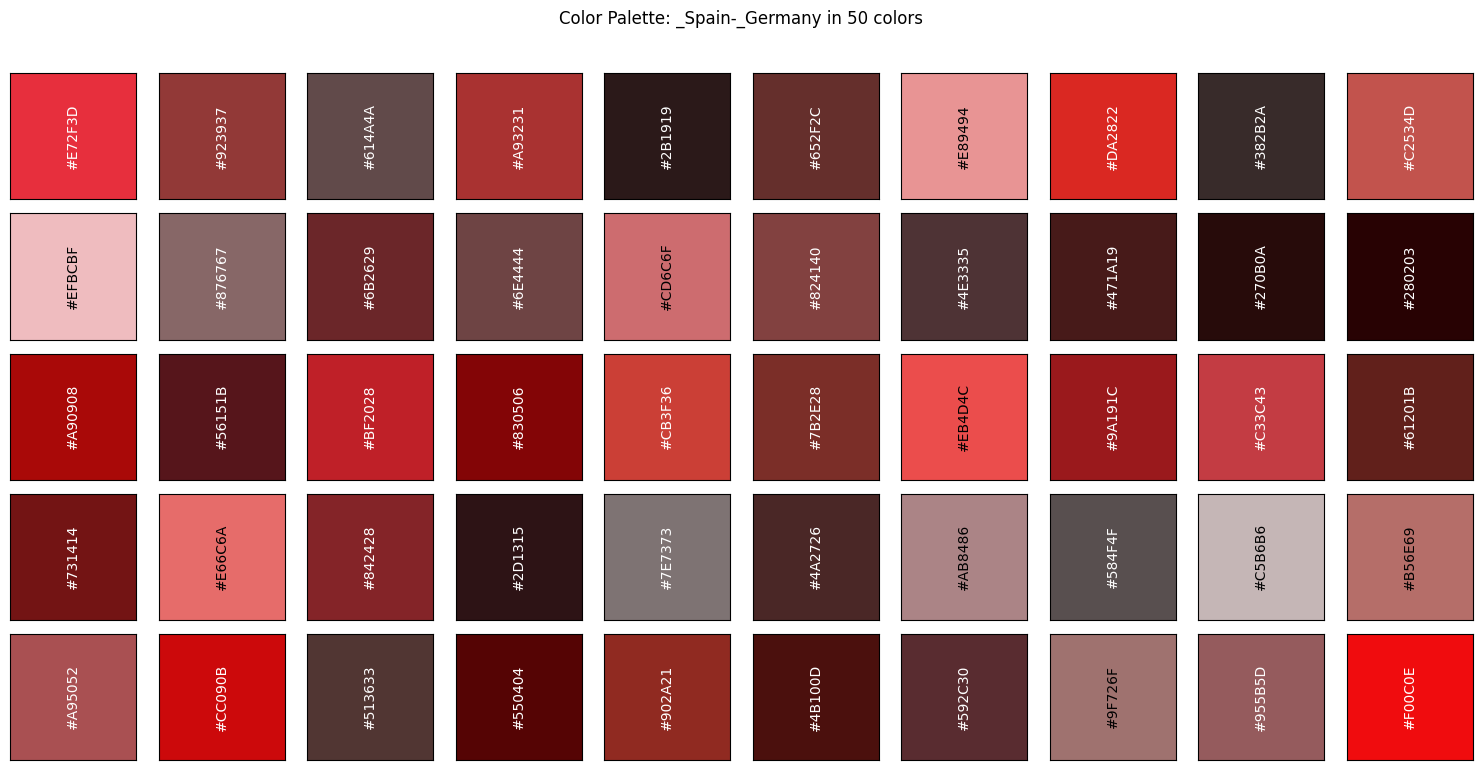

Plot saved to images/color_palettes/_India-_Flanders.png


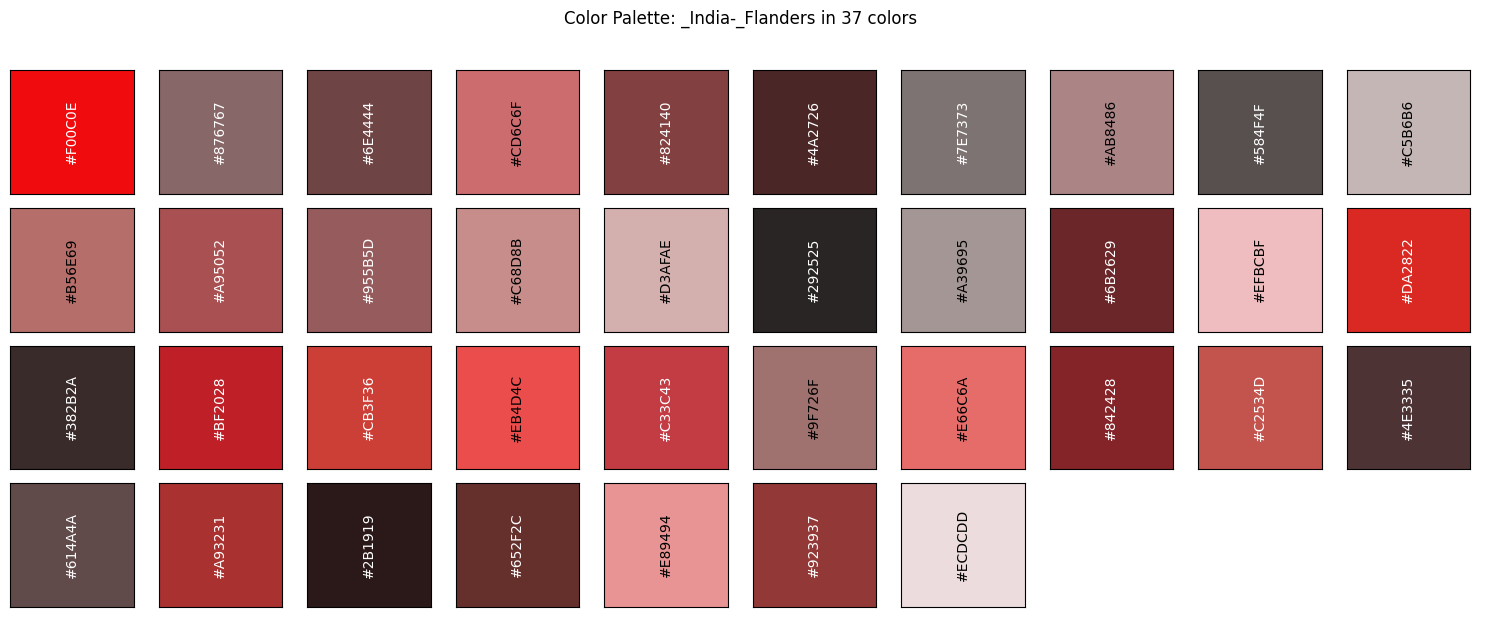

Plot saved to images/color_palettes/_India-_Germany.png


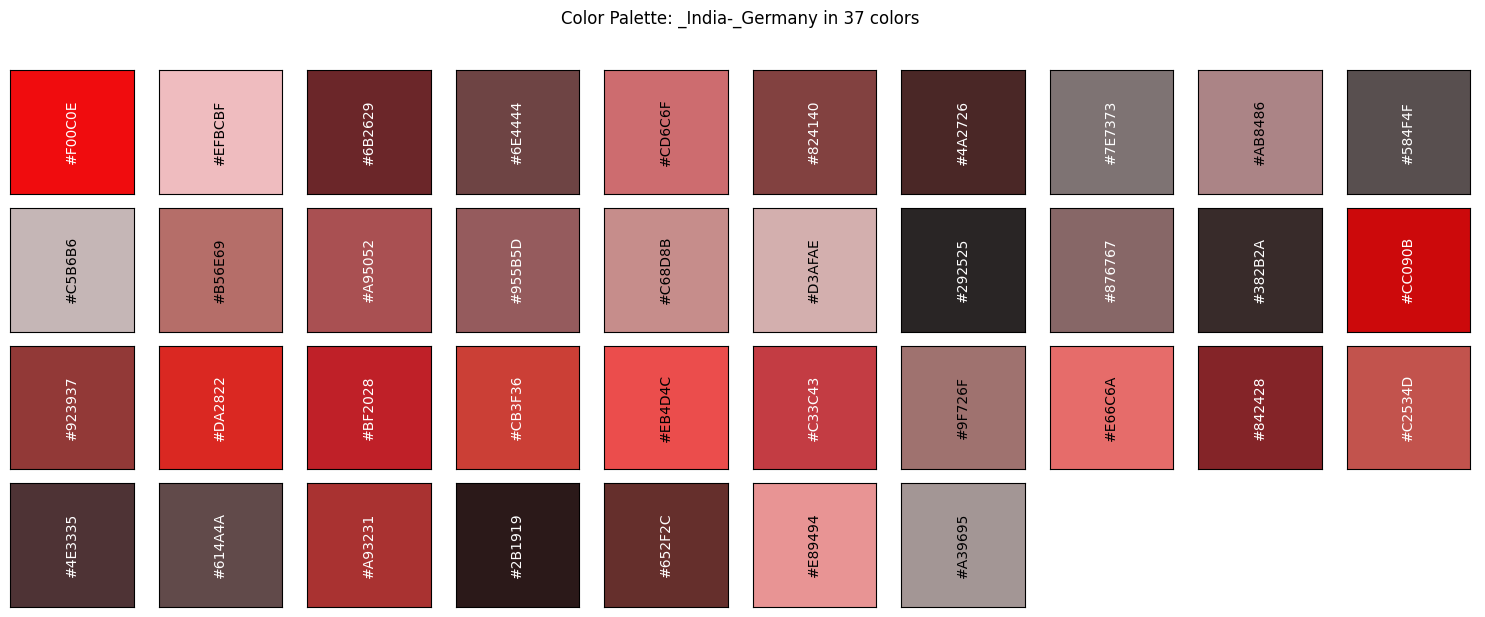

Plot saved to images/color_palettes/_Spain-_Flanders.png


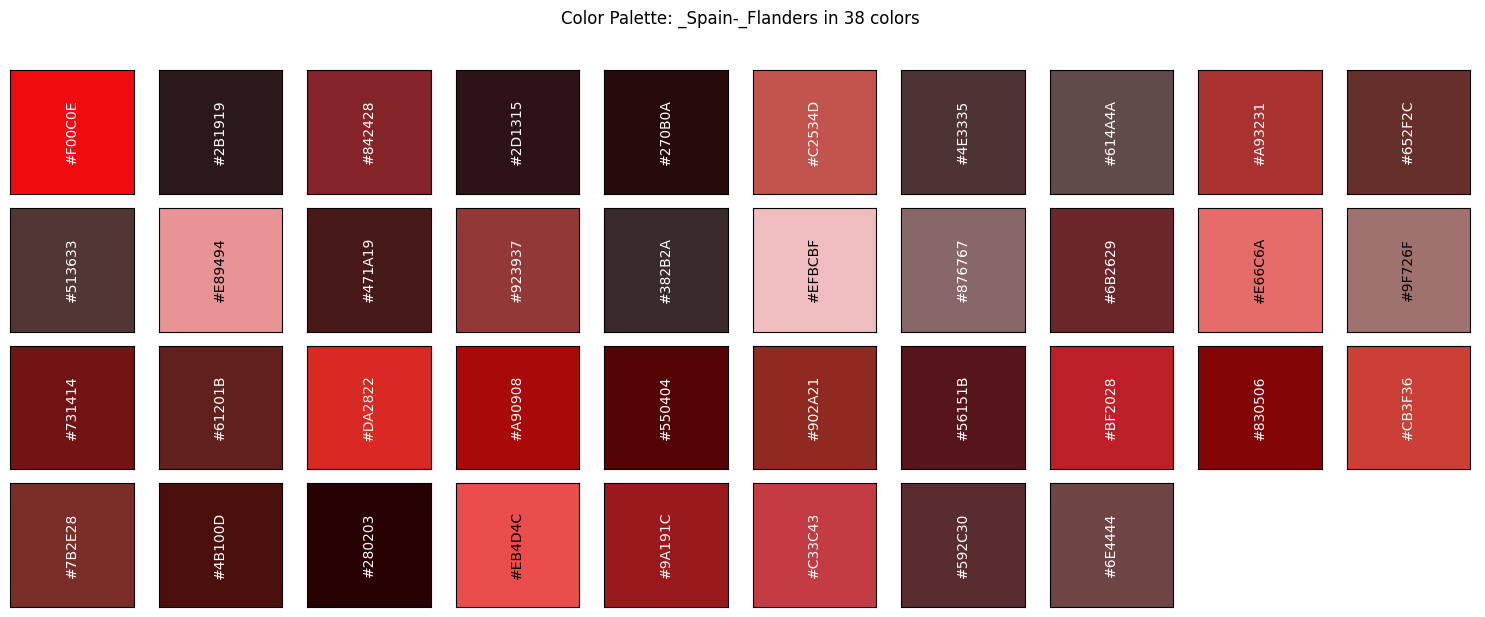

Plot saved to images/color_palettes/_Italy-_Flanders.png


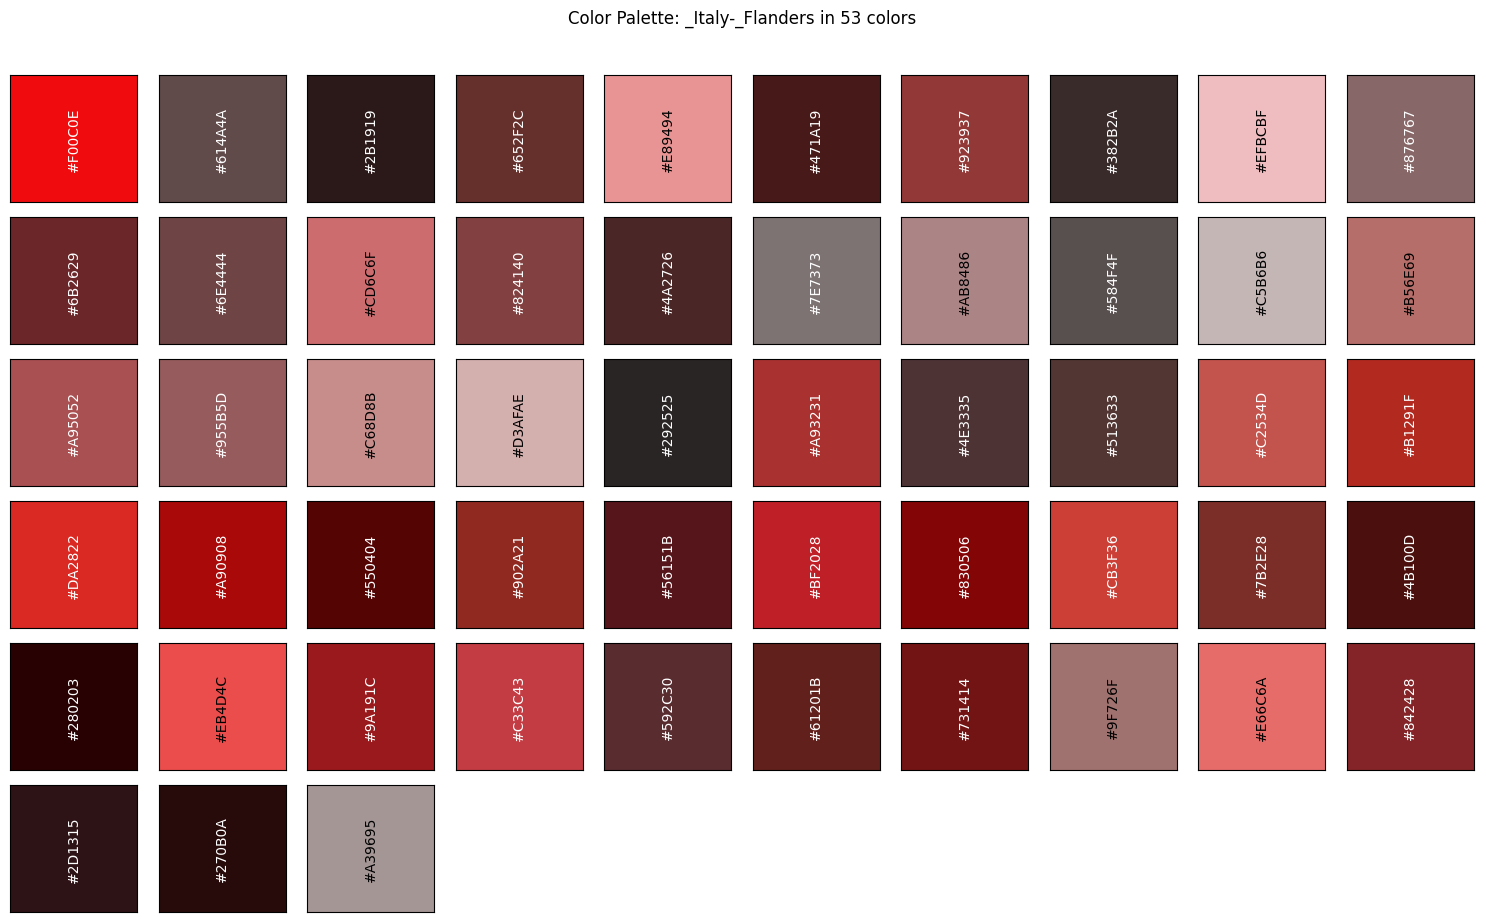

Plot saved to images/color_palettes/_Spain-_Netherlands.png


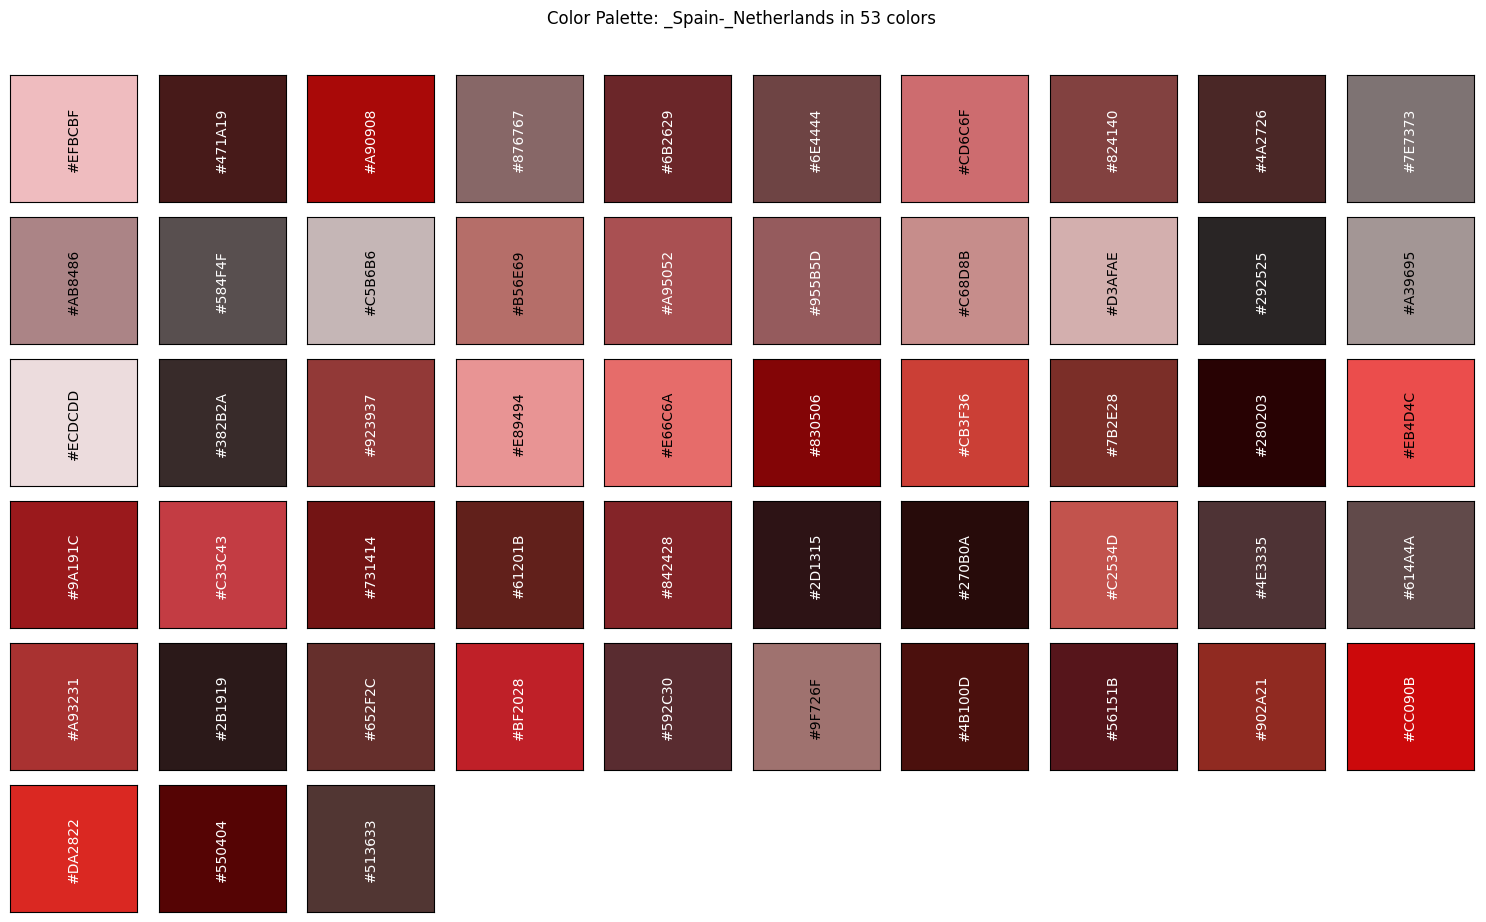

Plot saved to images/color_palettes/_Italy-_Netherlands.png


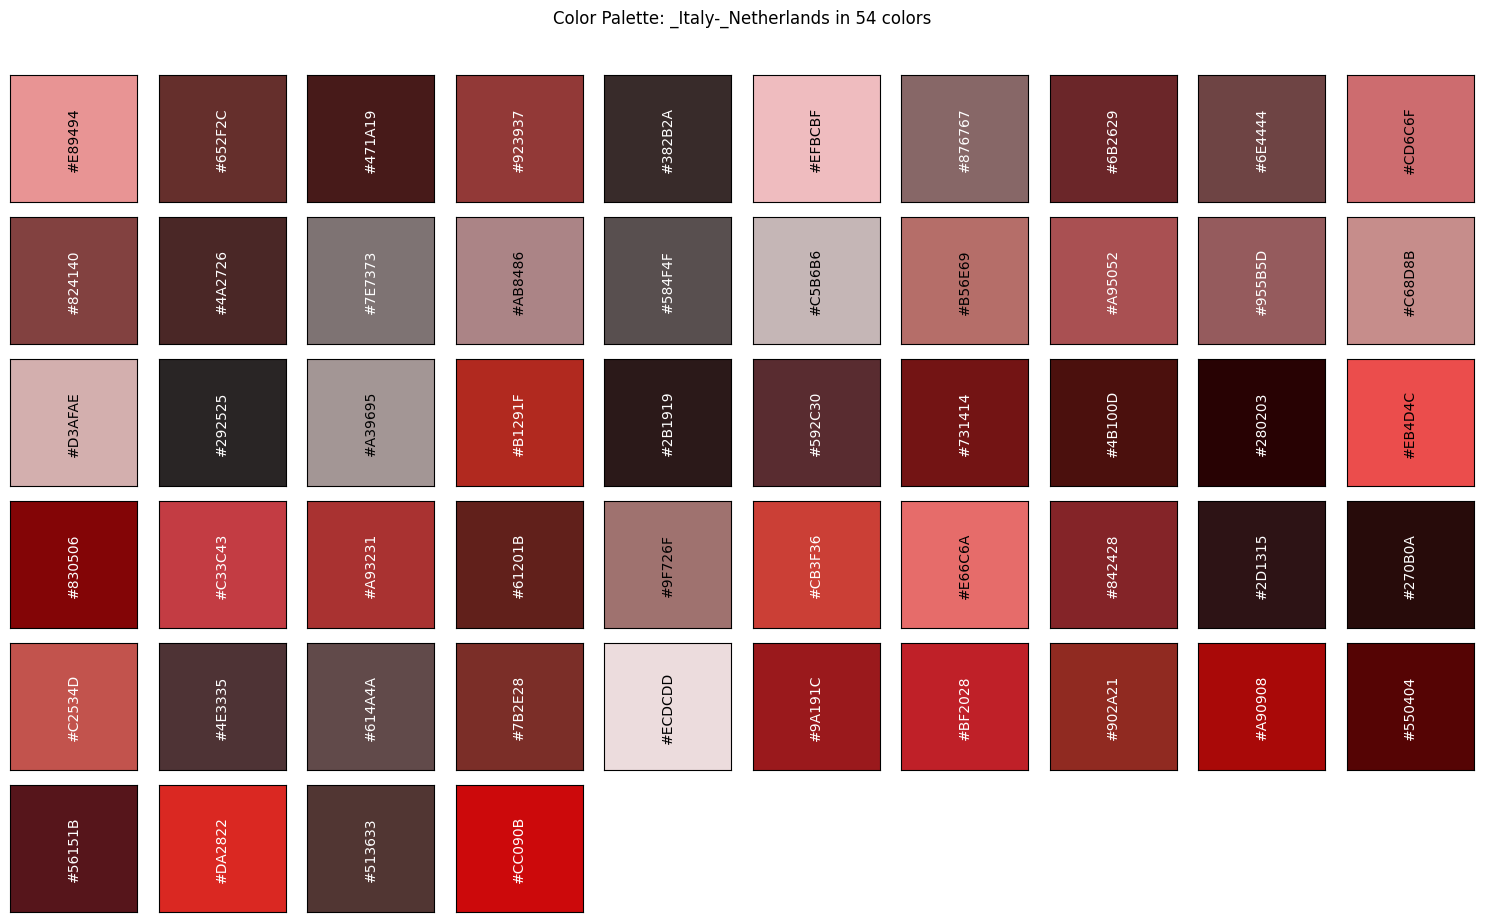

Plot saved to images/color_palettes/_Tibet-_Switzerland.png


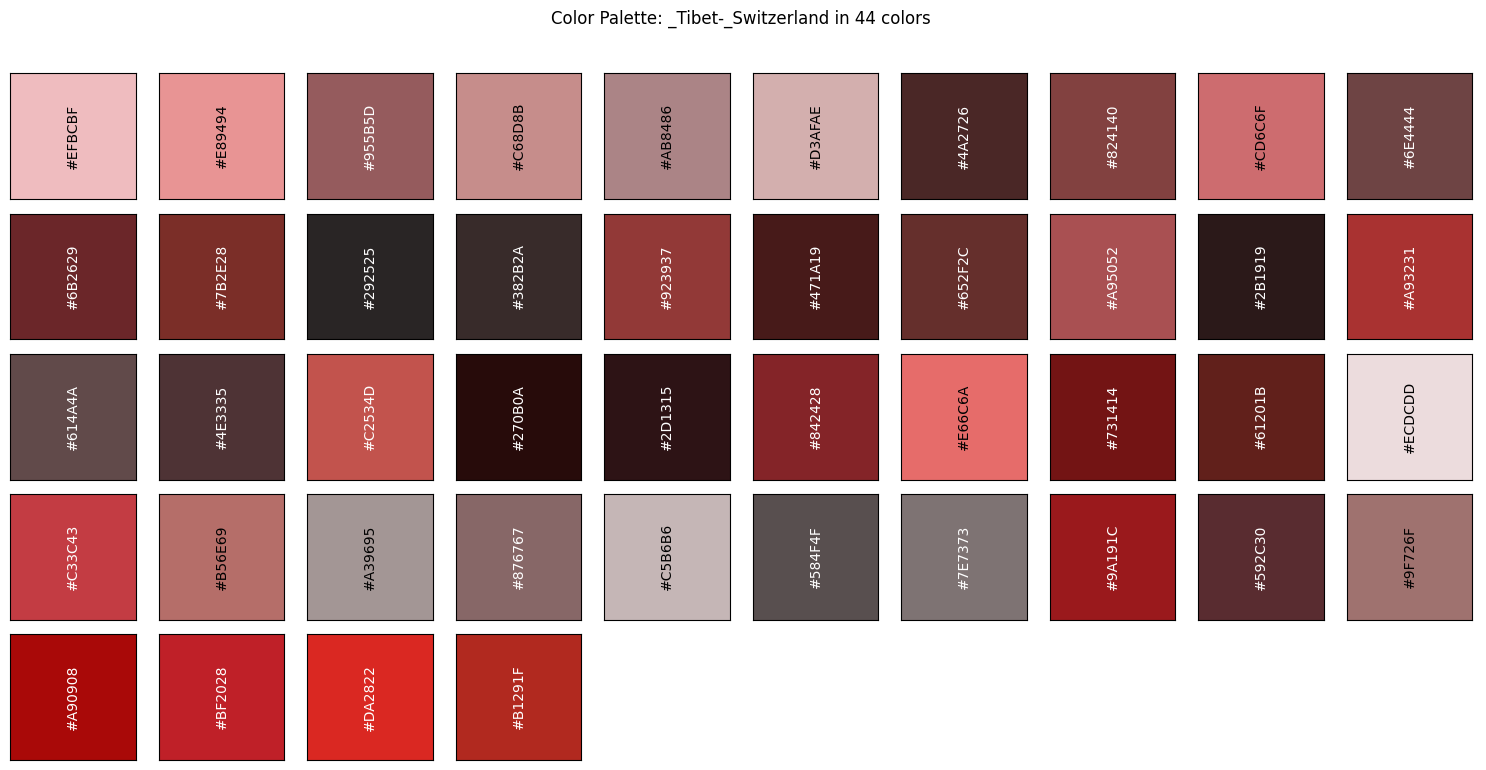

Plot saved to images/color_palettes/_Tibet-_Netherlands.png


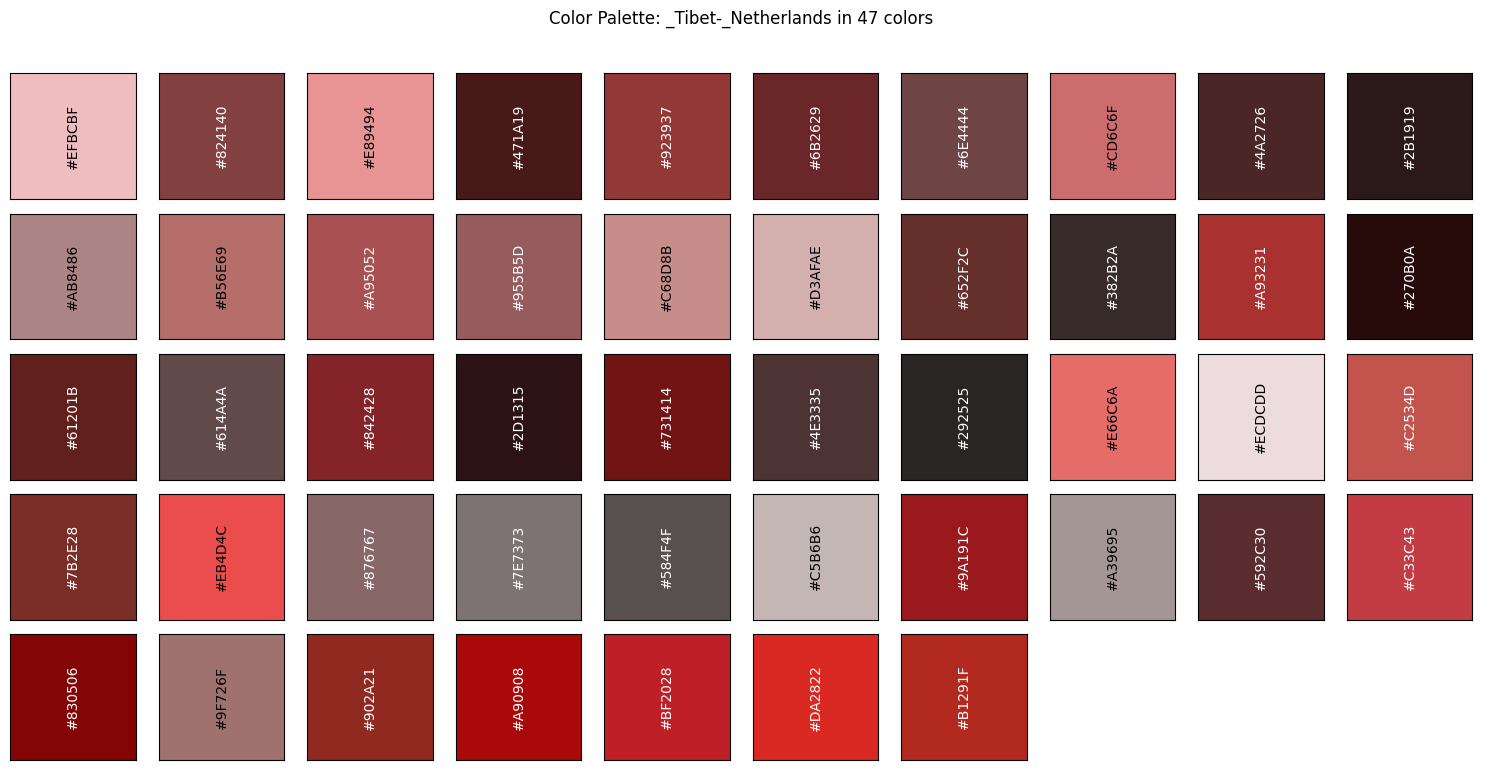

Plot saved to images/color_palettes/_Italy-_Switzerland.png


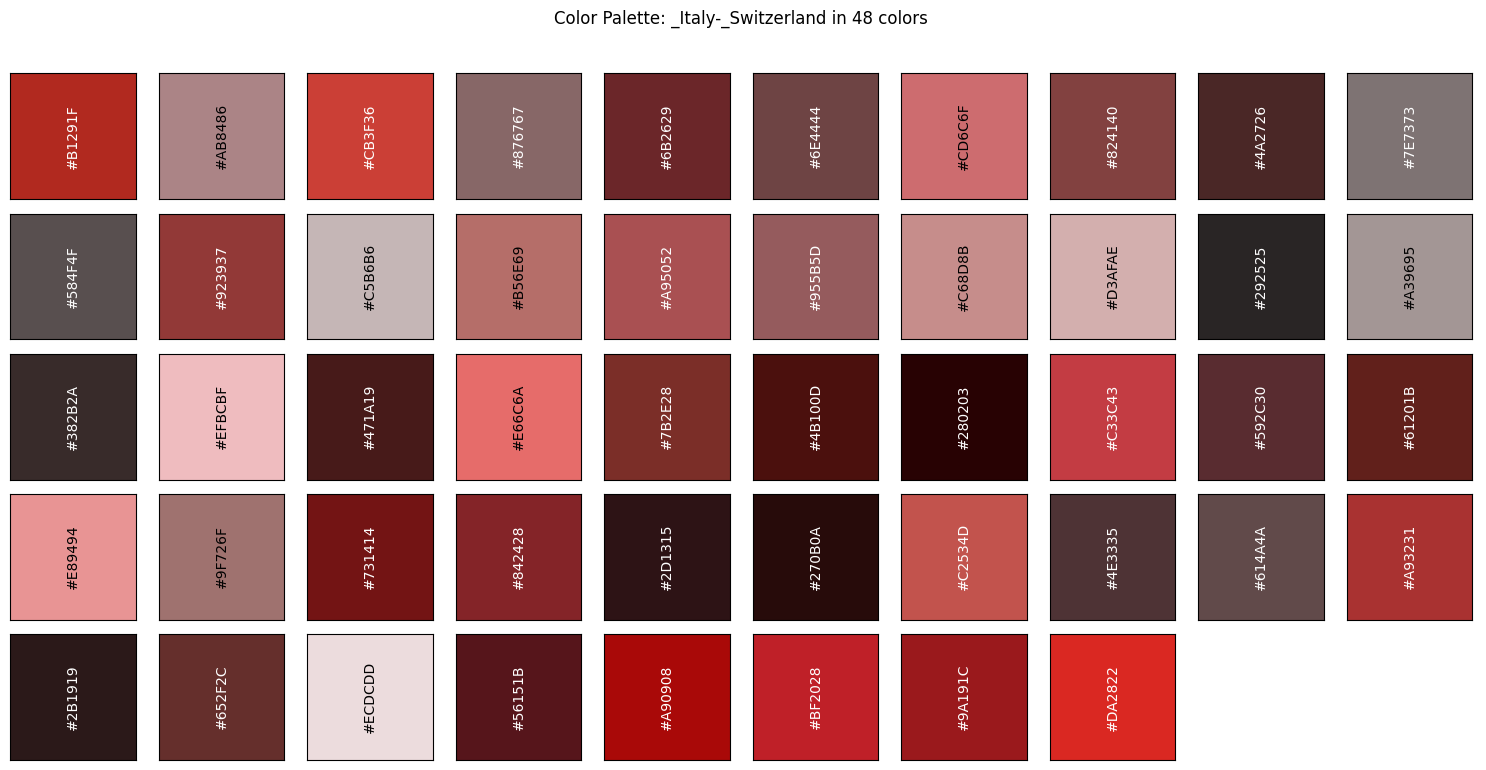

Plot saved to images/color_palettes/_China-_Switzerland.png


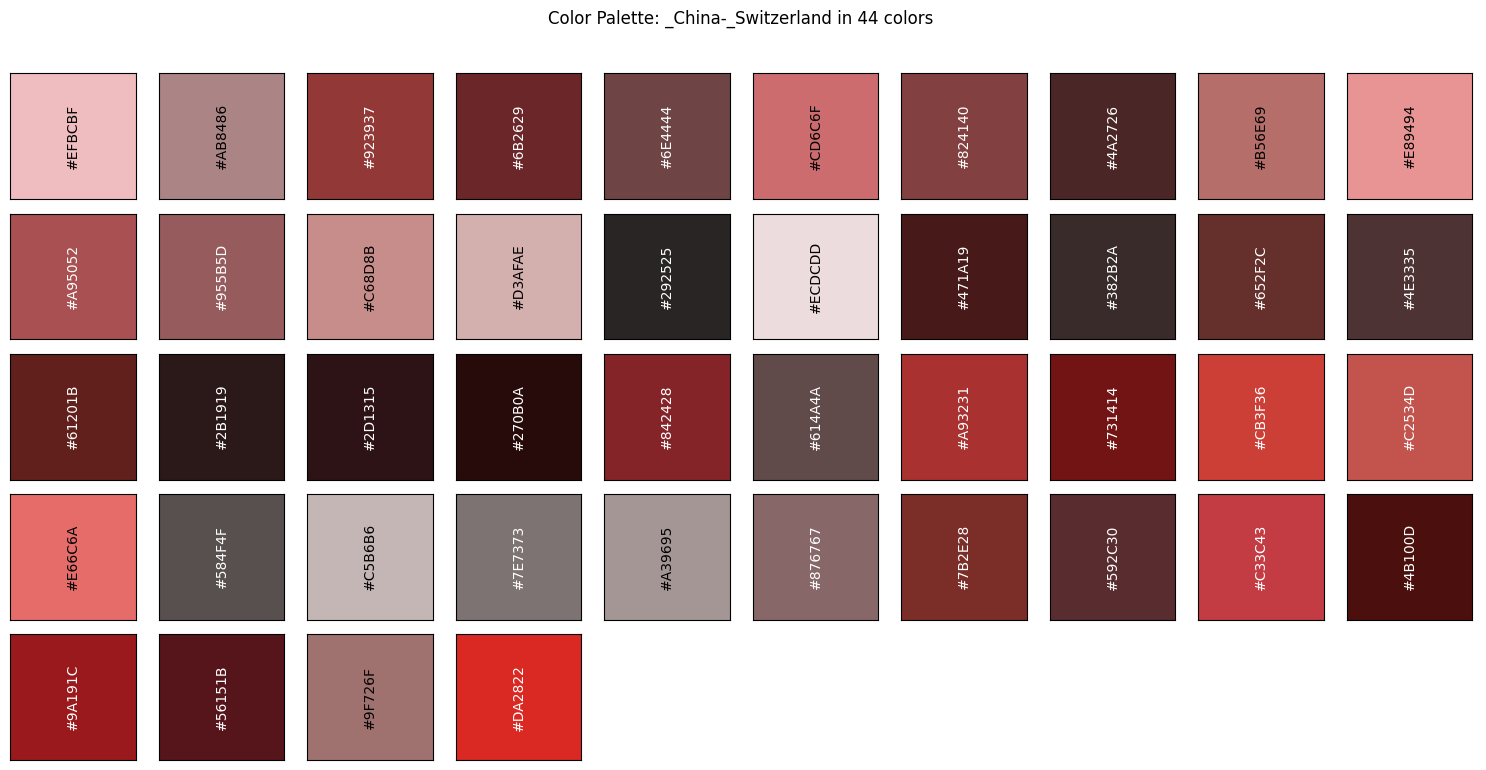

Plot saved to images/color_palettes/_China-_Netherlands.png


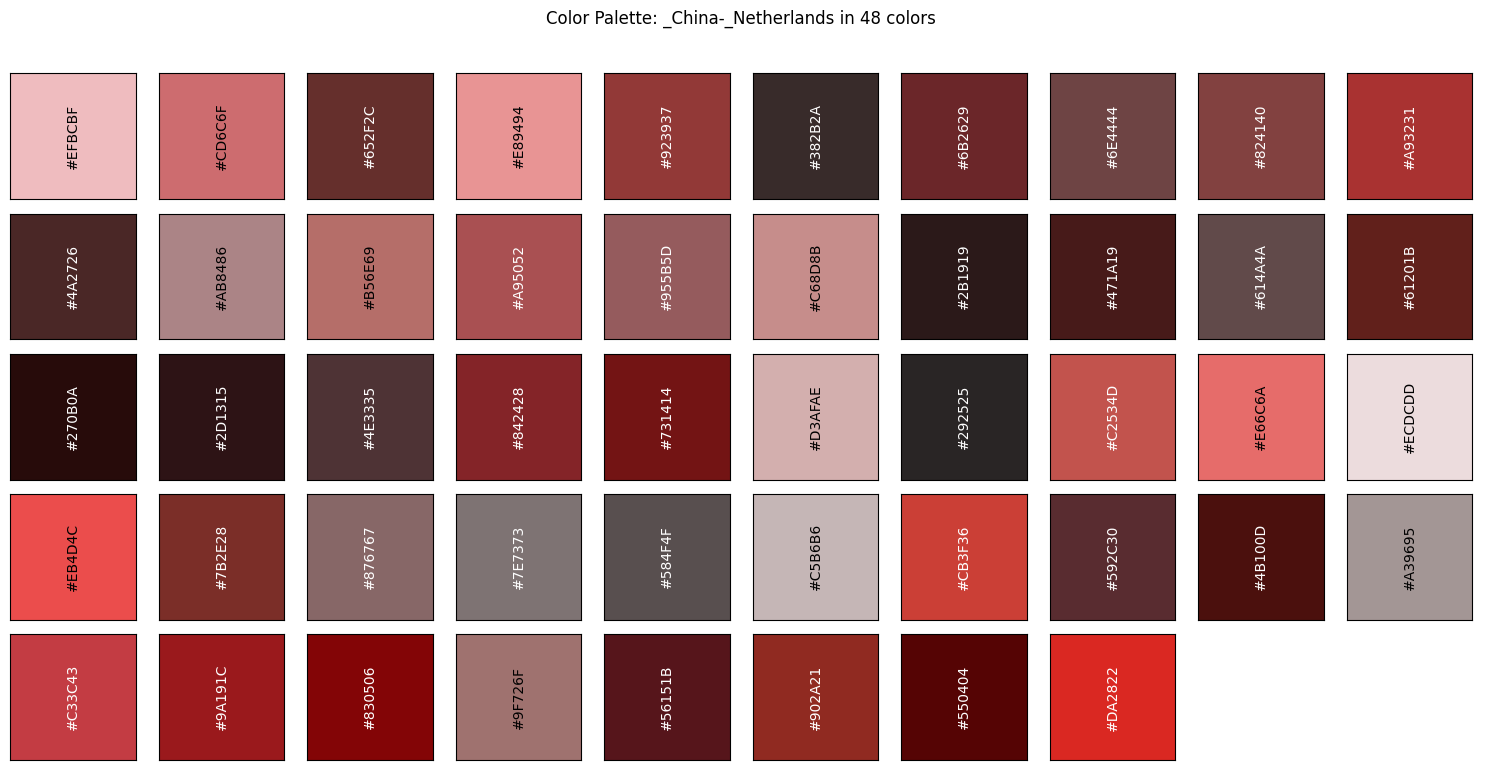

Plot saved to images/color_palettes/_Spain-_Switzerland.png


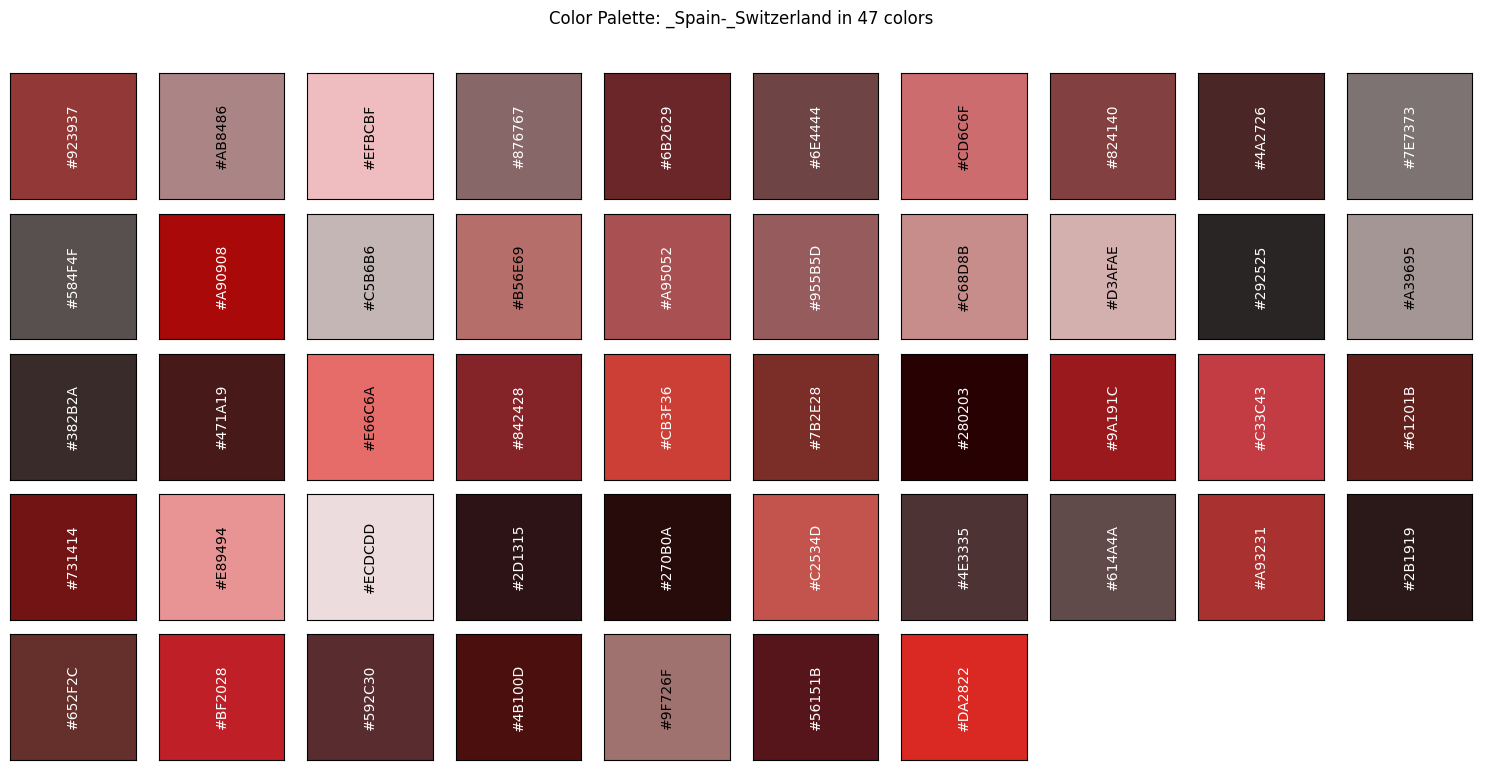

Plot saved to images/color_palettes/_Japan-_Netherlands.png


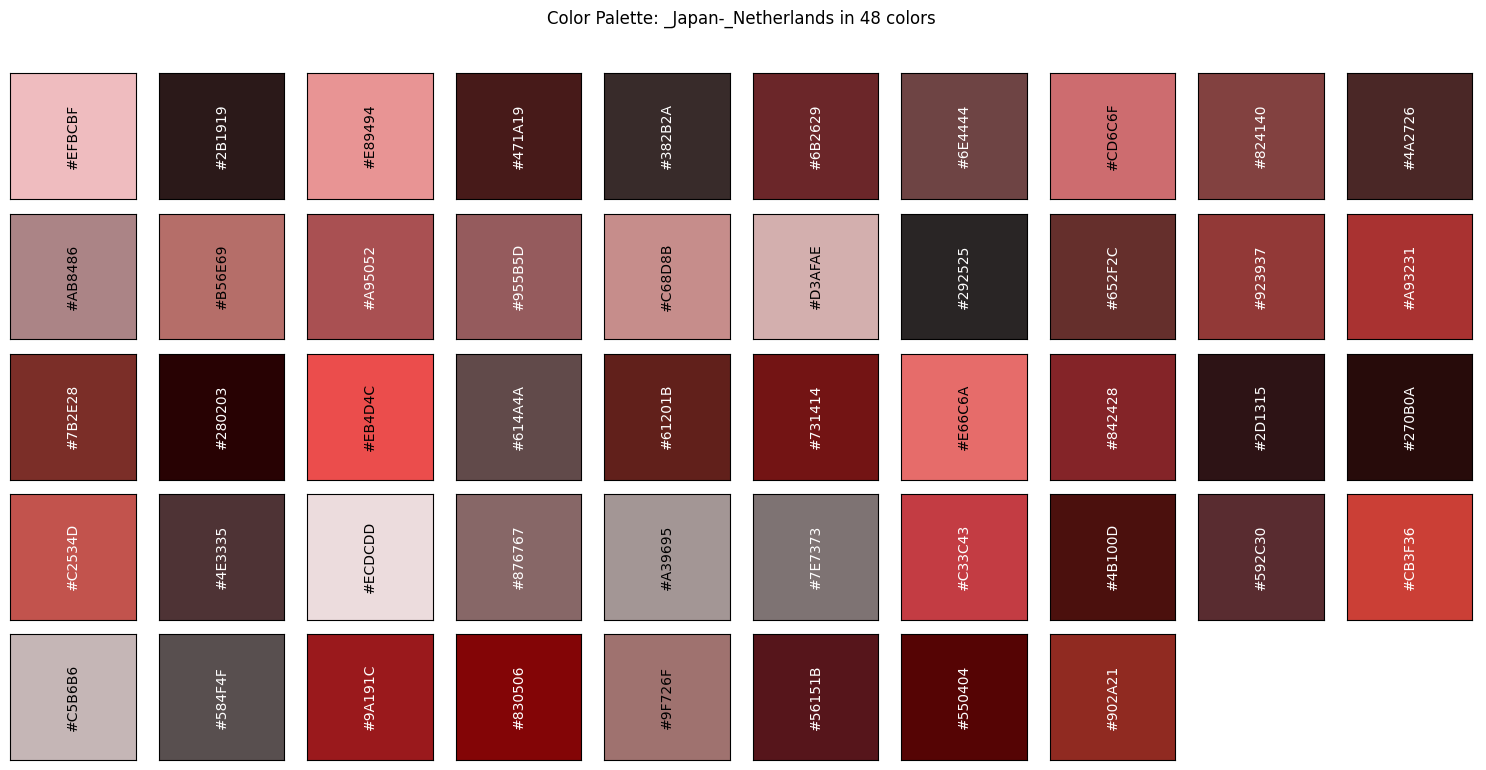

Plot saved to images/color_palettes/_Nepal-_Switzerland.png


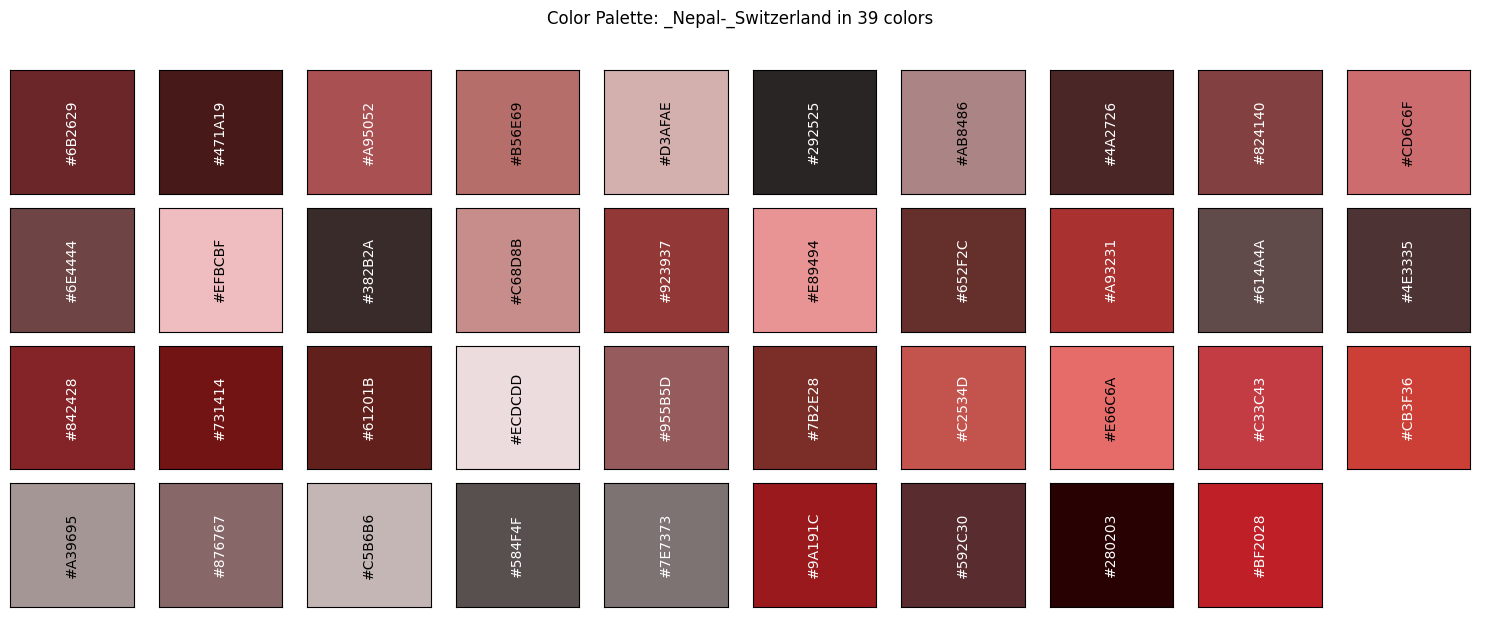

Plot saved to images/color_palettes/_Nepal-_Netherlands.png


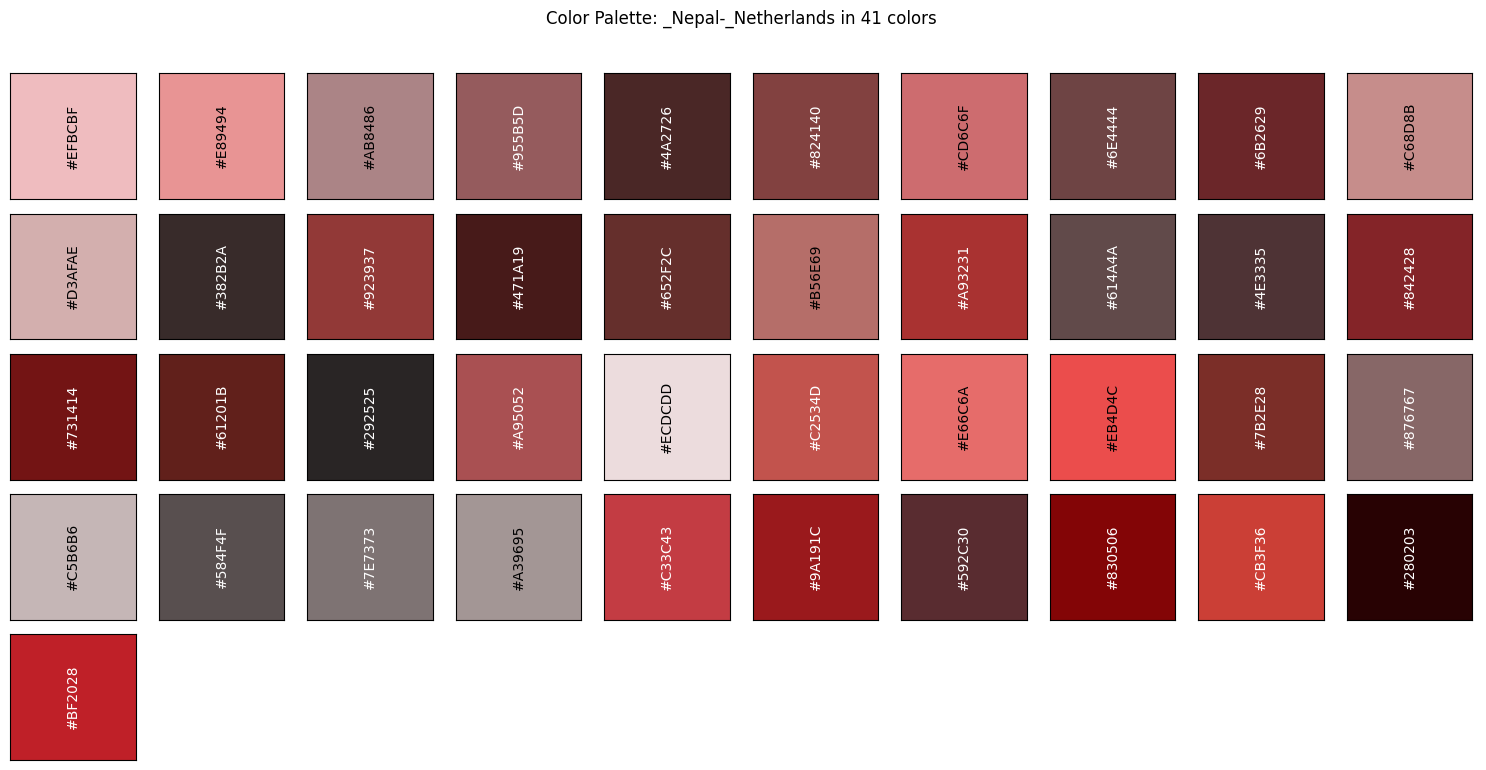

Plot saved to images/color_palettes/_Spain-_Czech_Republic.png


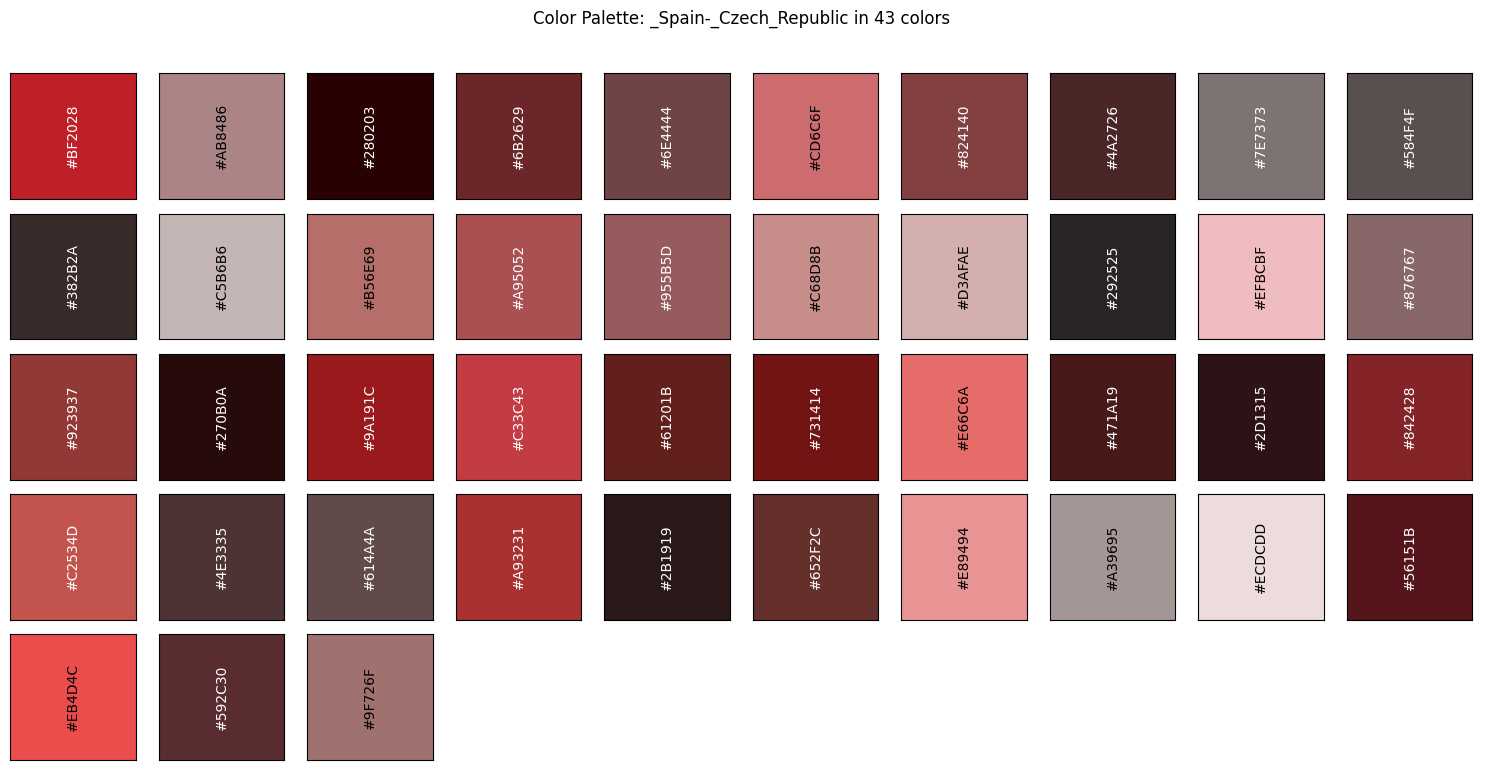

Plot saved to images/color_palettes/_China-_Czech_Republic.png


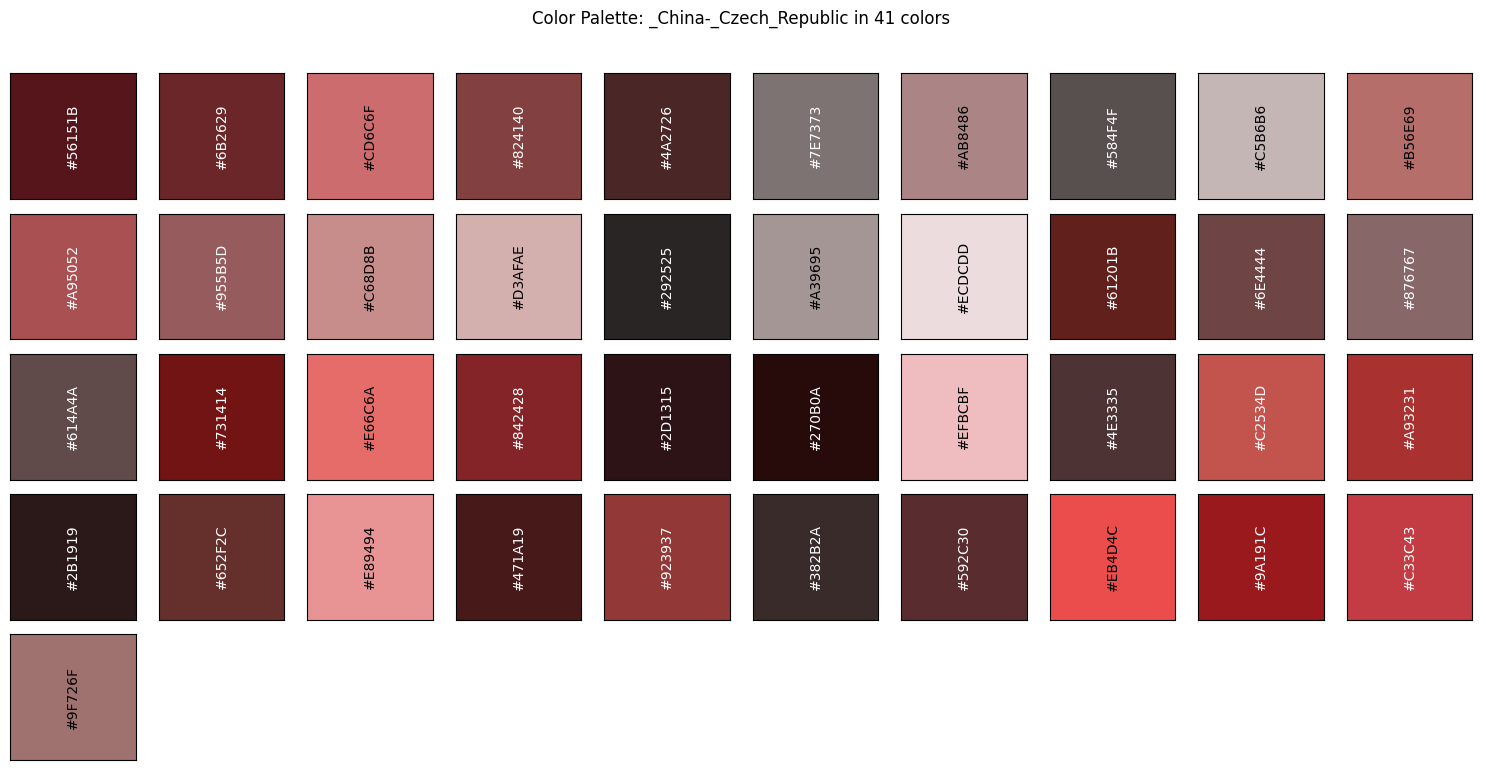

Plot saved to images/color_palettes/_Japan-_Switzerland.png


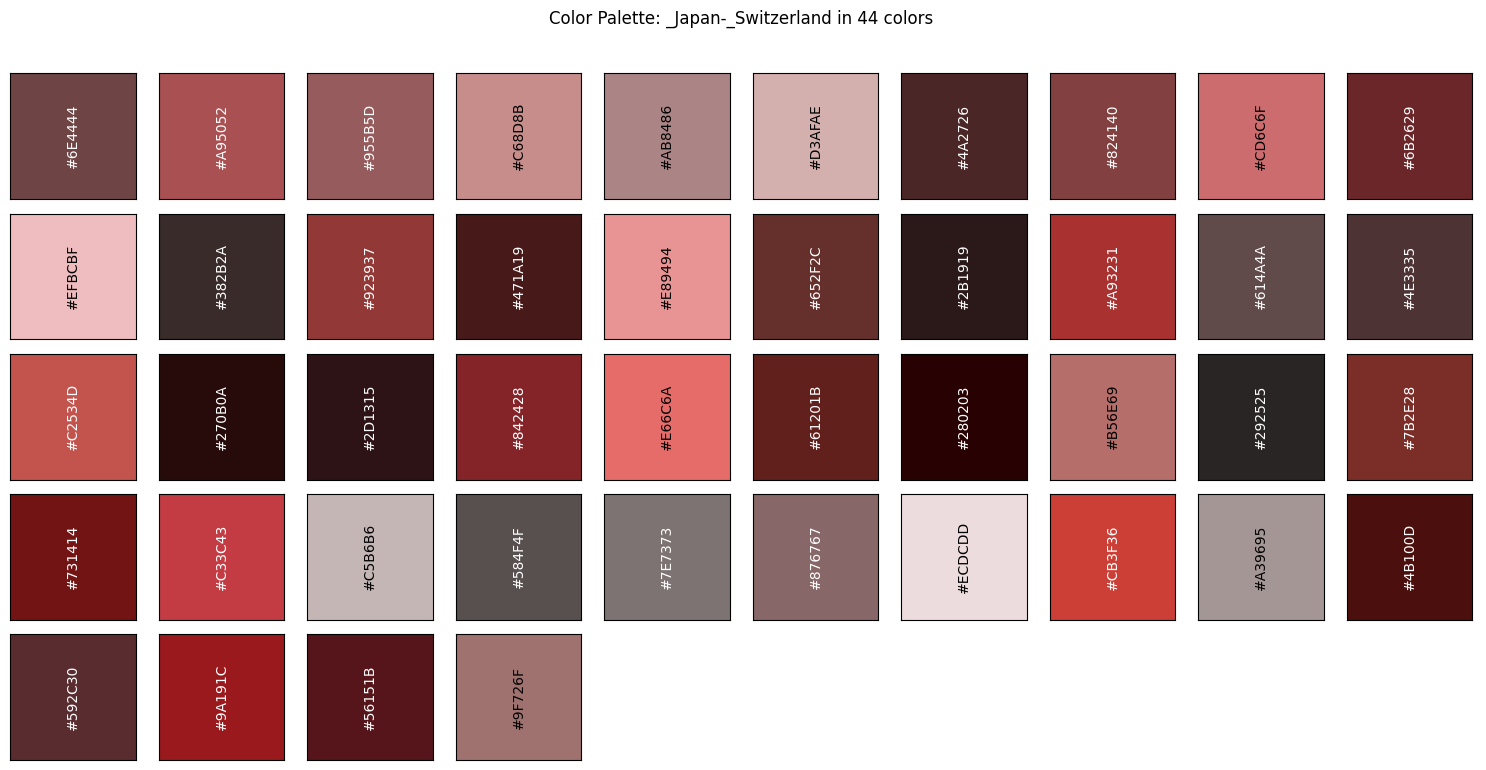

Plot saved to images/color_palettes/_Korea-_Roman_Empire.png


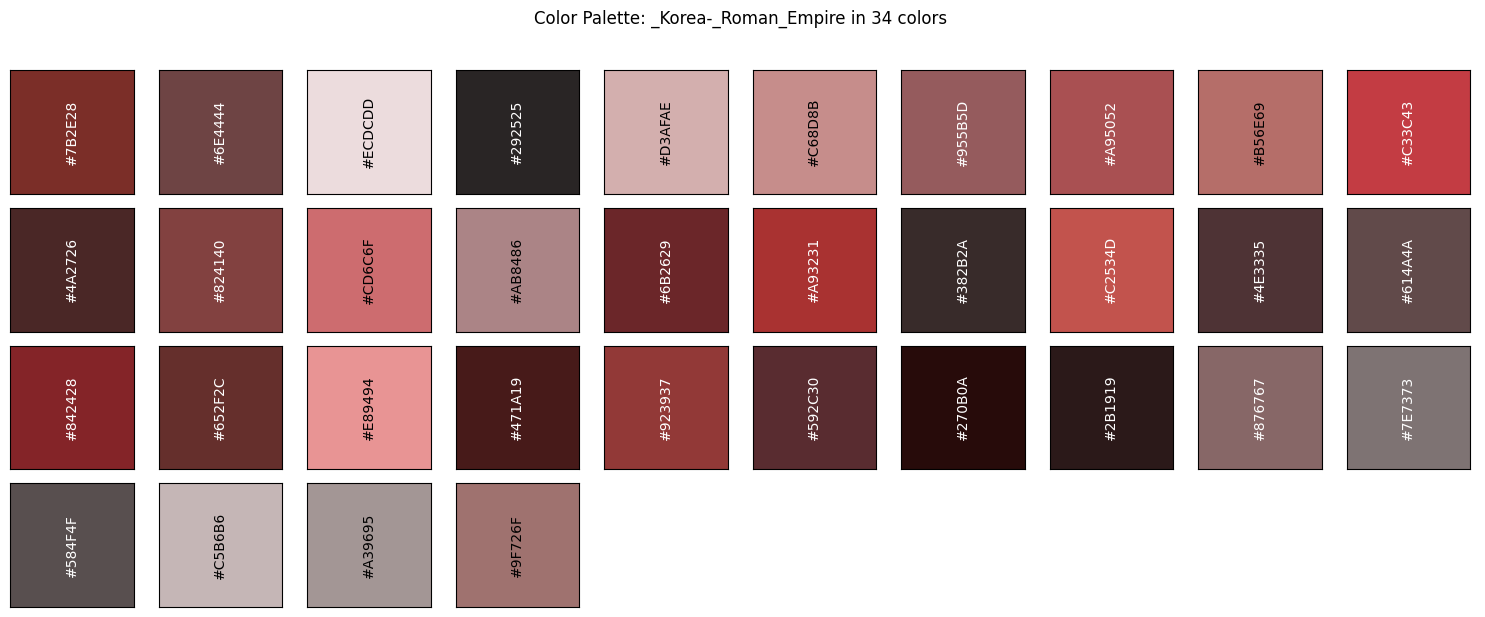

Plot saved to images/color_palettes/_Korea-_Switzerland.png


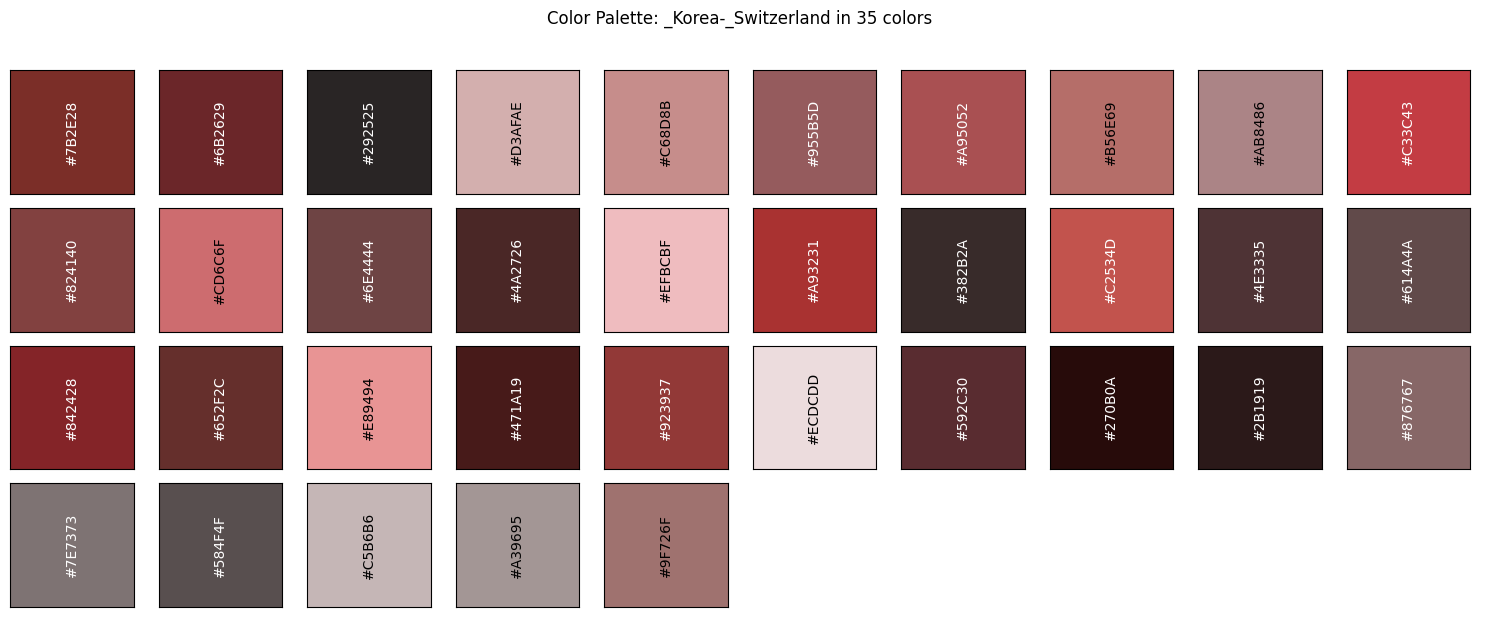

Plot saved to images/color_palettes/_Korea-_United_States.png


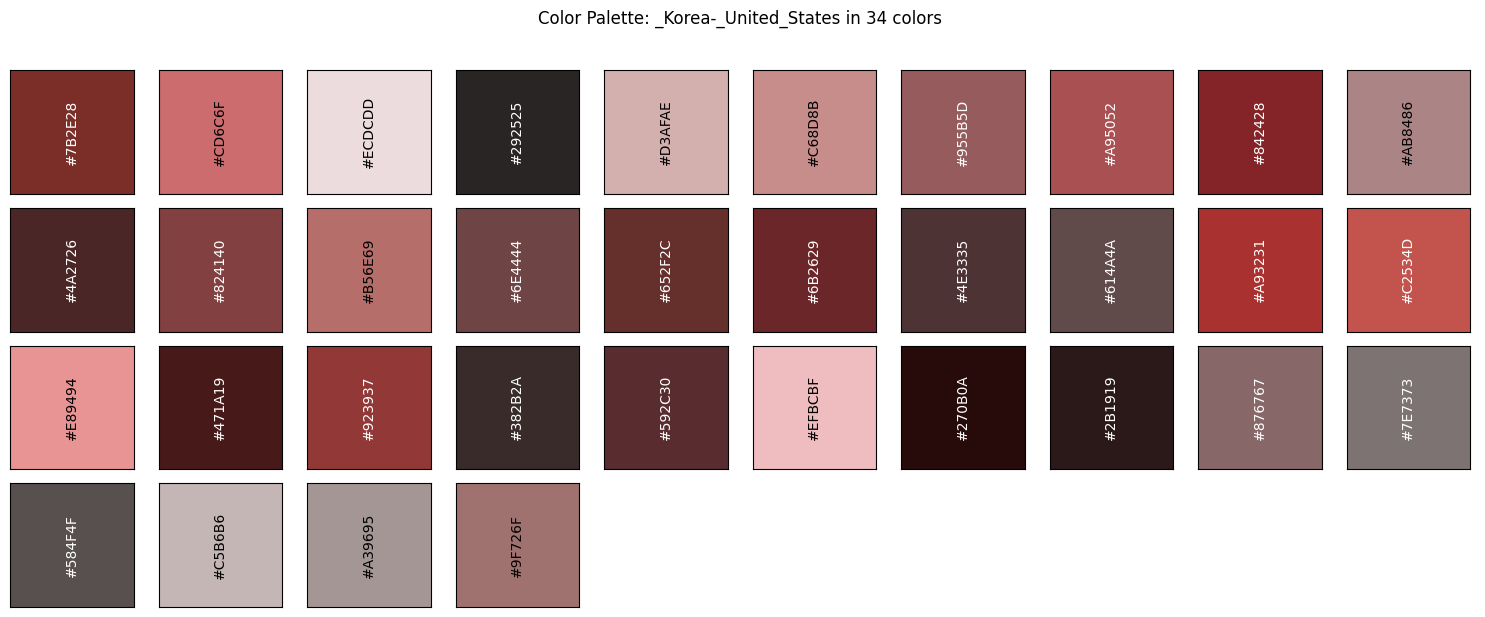

Plot saved to images/color_palettes/_China-_United_States.png


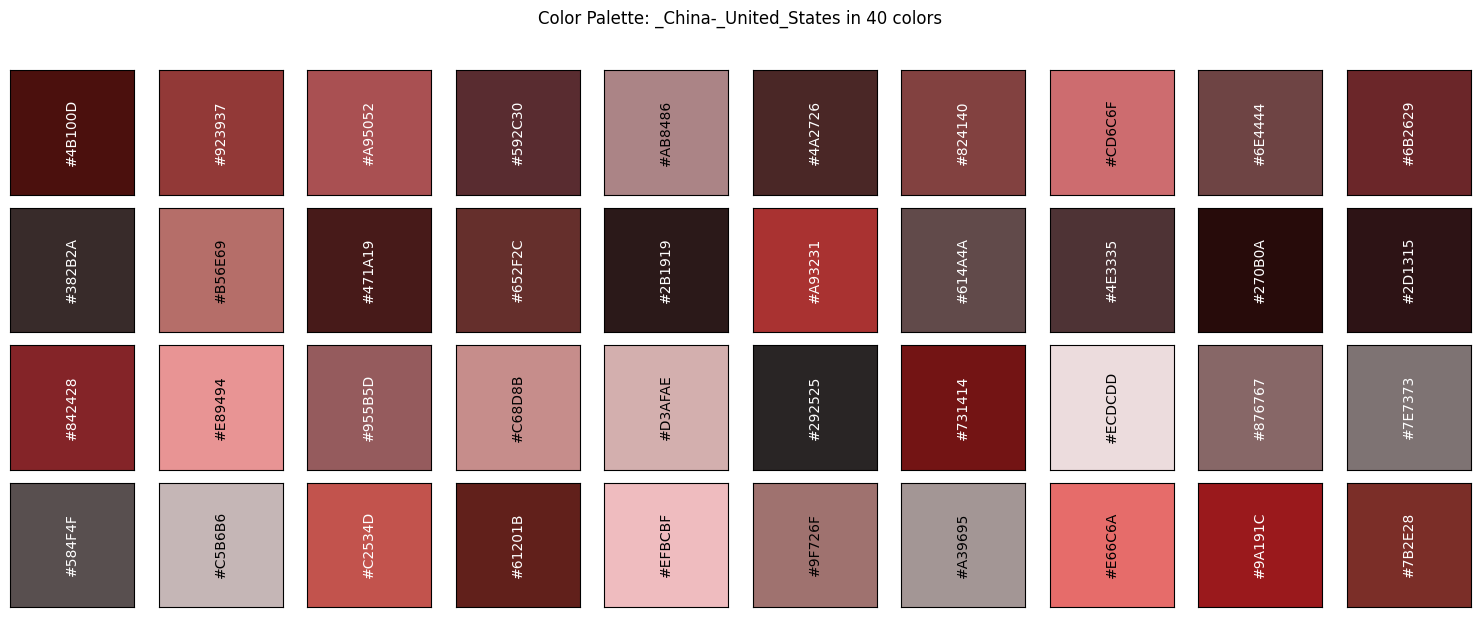

Plot saved to images/color_palettes/_Nepal-_Roman_Empire.png


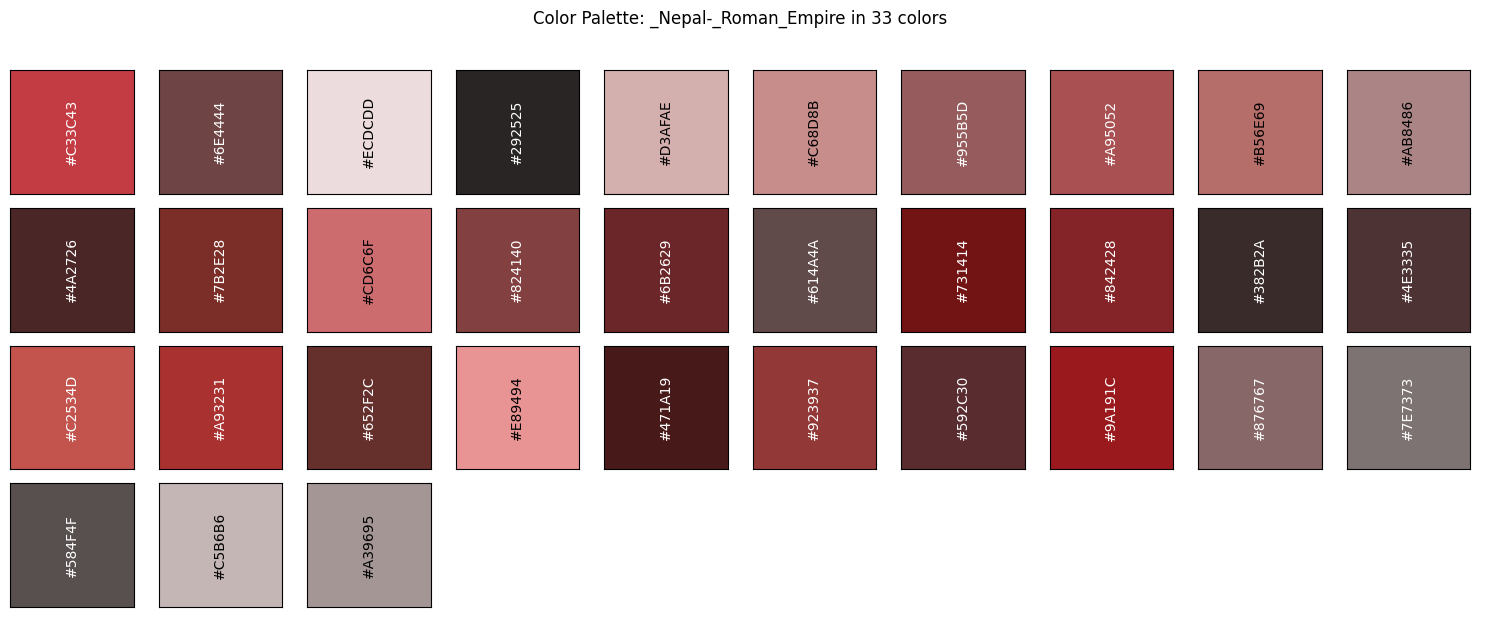

Plot saved to images/color_palettes/_Nepal-_United_States.png


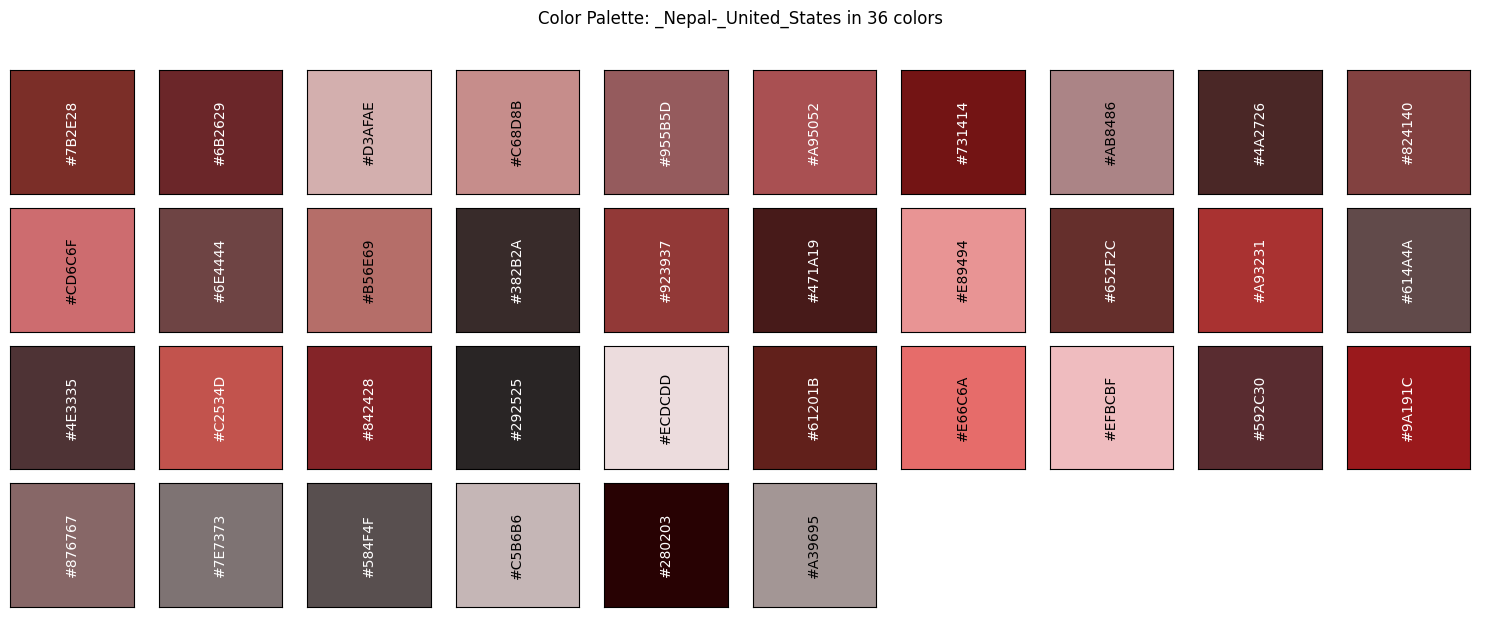

Plot saved to images/color_palettes/_China-_Roman_Empire.png


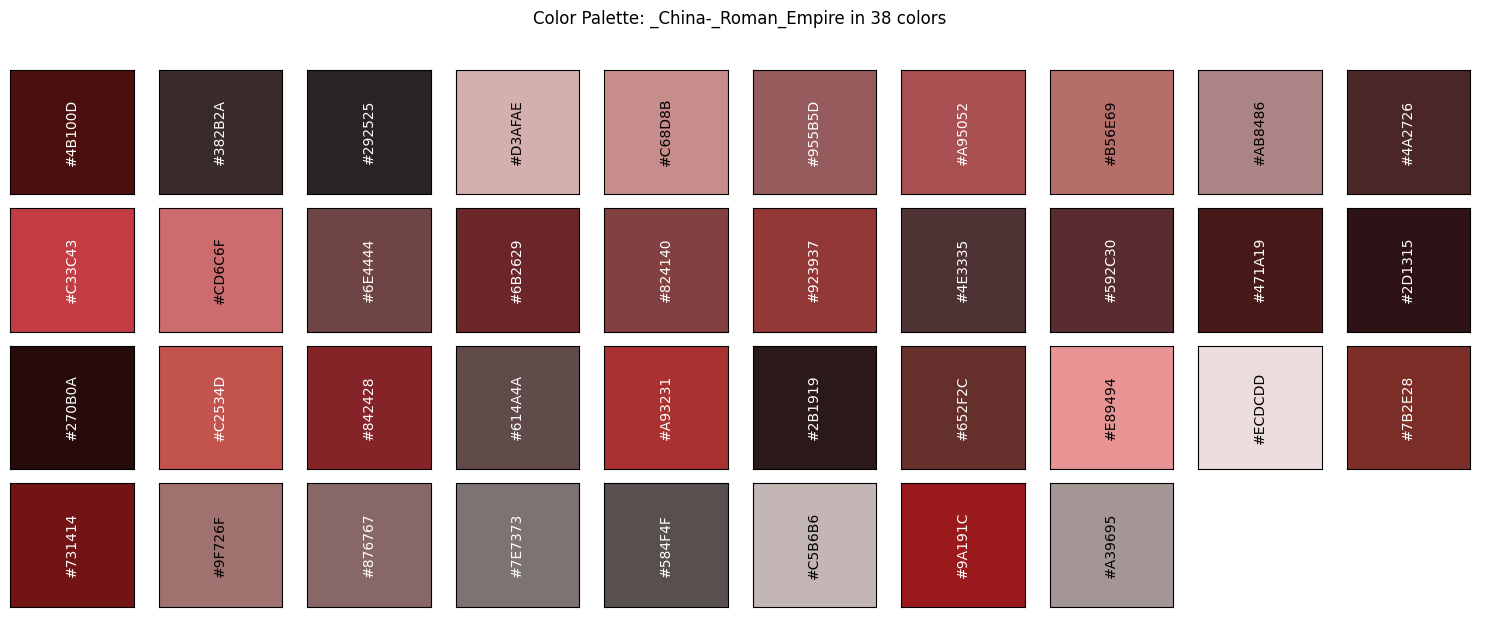

Plot saved to images/color_palettes/_Tibet-_Roman_Empire.png


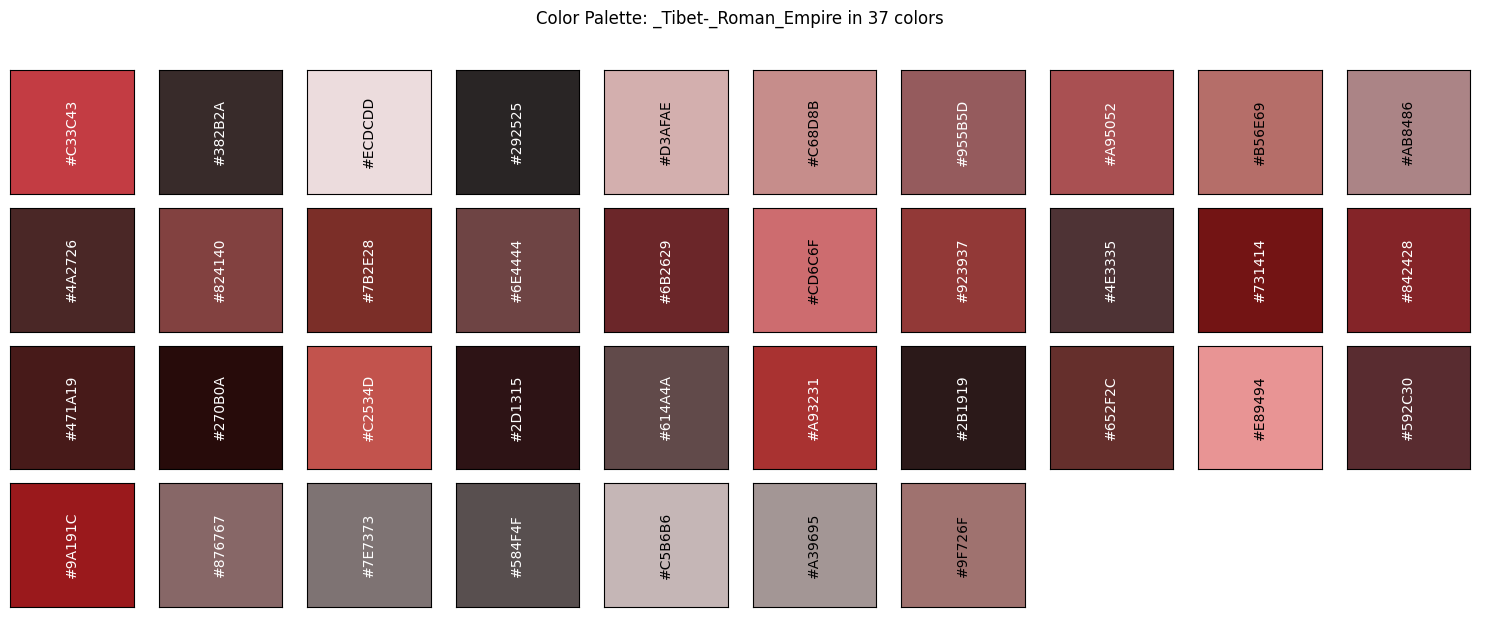

Plot saved to images/color_palettes/_Tibet-_United_States.png


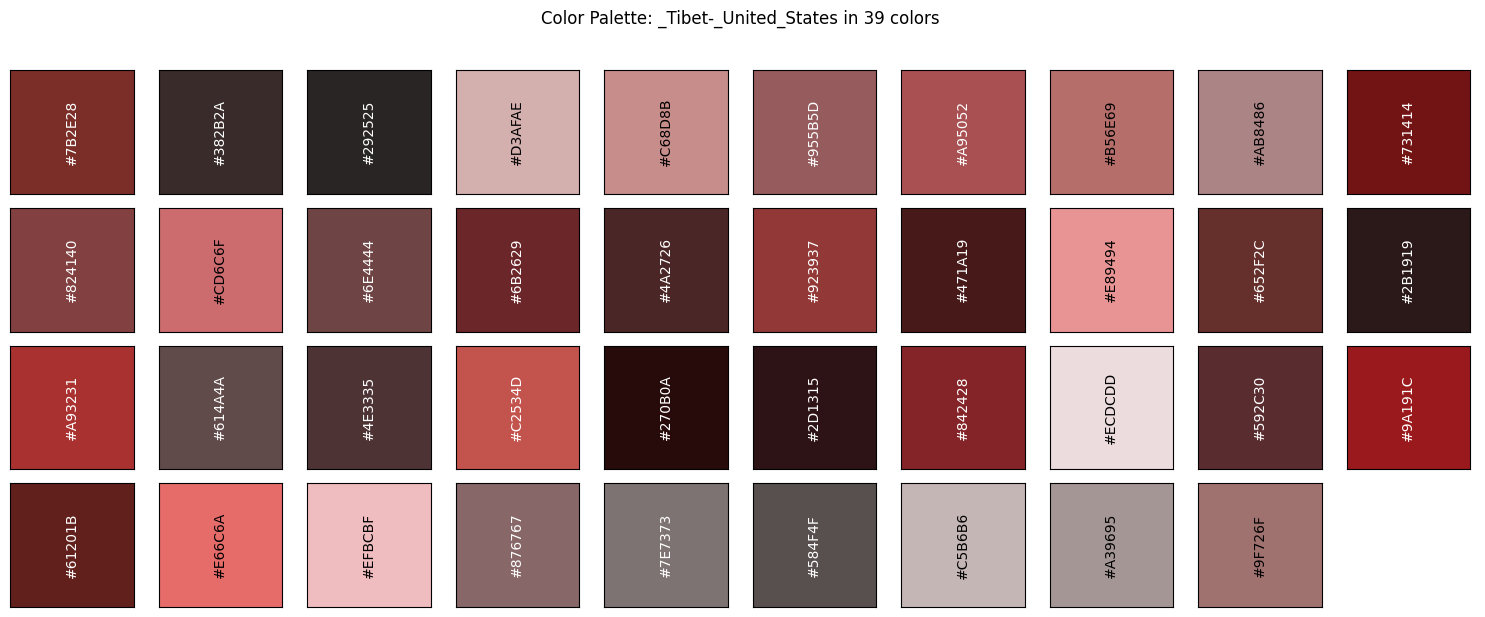

Plot saved to images/color_palettes/_Japan-_United_States.png


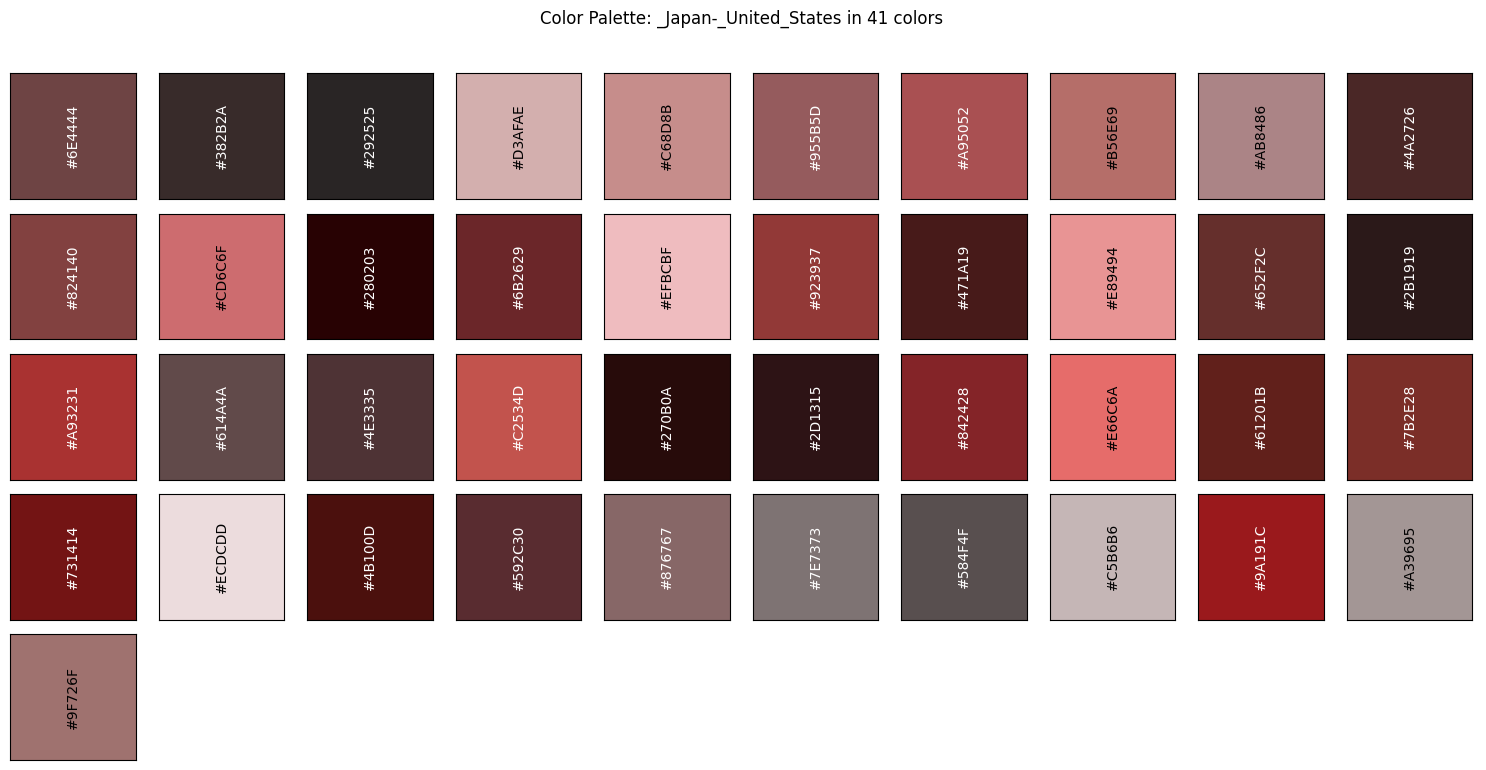

In [20]:
for school_range in unique_school_ranges:
    plotter.plot_color_grid(patterns_df, "schools", school_range, save_path=f"images/color_palettes/{school_range}.png")